In [ ]:
#import modules

import math
import statistics
import numpy as np
import scipy.stats
import pandas as pd

H0-1: There is no significant difference in the distance error across the three devices when comparing the averaged axes.
H1-1: There is a significant difference in the distance error across the three devices when comparing the averaged axes.

H0-2: There is no significant difference in the number of trials across the three devices when comparing the averaged axes.
H1-2: There is a significant difference in the number of trials across the three devices when comparing the averaged axes.

H0-3: There is no significant difference in the time taken across the three devices when comparing the averaged axes.
H1-3: There is a significant difference in the time taken across the three devices when comparing the averaged axes.



In [ ]:
#read data

df = pd.read_csv('avg_results.csv')
df

,User,Device,Trials,Distance Error,Time
0,1,glove,2.333333,4.109457,12
1,2,glove,1.666667,6.591493,9
2,3,glove,1.666667,5.754780,7
3,4,glove,3.000000,12.106930,12
4,5,glove,2.333333,2.217527,8
5,6,glove,1.333333,6.986343,5
6,7,glove,2.000000,7.387590,9
7,8,glove,2.666667,9.454687,12
8,9,glove,1.000000,1.532423,10
9,10,glove,2.333333,0.994893,7


In [ ]:
#create variable names to access testing conditions
glove_df = df[(df['Device'] == 'glove')]
ring_df = df[(df['Device'] == 'ring')]
none_df = df[(df['Device'] == 'none')]



In [ ]:
# Trials: calculate mean, median, sd, se, IQR for glove
glove_trials_mean = glove_df['Trials'].mean()
glove_trials_median = glove_df['Trials'].median()
glove_trials_sd = glove_df['Trials'].std()
glove_trials_se = glove_df['Trials'].sem()
glove_trials_iqr = glove_df['Trials'].quantile(0.75) - glove_df['Trials'].quantile(0.25)

# Distance Error: calculate mean, median, sd, se, IQR for glove
glove_distance_mean = glove_df['Distance Error'].mean()
glove_distance_median = glove_df['Distance Error'].median()
glove_distance_sd = glove_df['Distance Error'].std()
glove_distance_se = glove_df['Distance Error'].sem()
glove_distance_iqr = glove_df['Distance Error'].quantile(0.75) - glove_df['Distance Error'].quantile(0.25)

# Time: calculate mean, median, sd, se, IQR for glove
glove_time_mean = glove_df['Time'].mean()
glove_time_median = glove_df['Time'].median()
glove_time_sd = glove_df['Time'].std()
glove_time_se = glove_df['Time'].sem()
glove_time_iqr = glove_df['Time'].quantile(0.75) - glove_df['Time'].quantile(0.25)

# Trials: calculate mean, median, sd, se, IQR for ring
ring_trials_mean = ring_df['Trials'].mean()
ring_trials_median = ring_df['Trials'].median()
ring_trials_sd = ring_df['Trials'].std()
ring_trials_se = ring_df['Trials'].sem()
ring_trials_iqr = ring_df['Trials'].quantile(0.75) - ring_df['Trials'].quantile(0.25)

# Distance Error: calculate mean, median, sd, se, IQR for ring
ring_distance_mean = ring_df['Distance Error'].mean()
ring_distance_median = ring_df['Distance Error'].median()
ring_distance_sd = ring_df['Distance Error'].std()
ring_distance_se = ring_df['Distance Error'].sem()
ring_distance_iqr = ring_df['Distance Error'].quantile(0.75) - ring_df['Distance Error'].quantile(0.25)

# Time: calculate mean, median, sd, se, IQR for ring
ring_time_mean = ring_df['Time'].mean()
ring_time_median = ring_df['Time'].median()
ring_time_sd = ring_df['Time'].std()
ring_time_se = ring_df['Time'].sem()
ring_time_iqr = ring_df['Time'].quantile(0.75) - ring_df['Time'].quantile(0.25)

# Trials: calculate mean, median, sd, se, IQR for hand
none_trials_mean = none_df['Trials'].mean()
none_trials_median = none_df['Trials'].median()
none_trials_sd = none_df['Trials'].std()
none_trials_se = none_df['Trials'].sem()
none_trials_iqr = none_df['Trials'].quantile(0.75) - none_df['Trials'].quantile(0.25)

# Distance Error: calculate mean, median, sd, se, IQR for none
none_distance_mean = none_df['Distance Error'].mean()
none_distance_median = none_df['Distance Error'].median()
none_distance_sd = none_df['Distance Error'].std()
none_distance_se = none_df['Distance Error'].sem()
none_distance_iqr = none_df['Distance Error'].quantile(0.75) - none_df['Distance Error'].quantile(0.25)

# Time: calculate mean, median, sd, se, IQR for none
none_time_mean = none_df['Time'].mean()
none_time_median = none_df['Time'].median()
none_time_sd = none_df['Time'].std()
none_time_se = none_df['Time'].sem()
none_time_iqr = none_df['Time'].quantile(0.75) - none_df['Time'].quantile(0.25)



In [ ]:
# bootstrap confidence interval: distance error

import numpy as np
from scipy.stats import bootstrap

# glove distance error
data = np.array(glove_df['Distance Error'])
glove_distance_result = bootstrap(
    (data,),
    np.median,
    confidence_level=0.95,
    n_resamples=5000,
    method='BCa'
)
glove_distance_ci_low, glove_distance_ci_high = glove_distance_result.confidence_interval
print("Median:", np.median(data))
print("95% CI:", (glove_distance_ci_low, glove_distance_ci_high))

# ring distance error
data = np.array(ring_df['Distance Error'])
ring_distance_result = bootstrap(
    (data,),
    np.median,
    confidence_level=0.95,
    n_resamples=5000,
    method='BCa'
)
ring_distance_ci_low, ring_distance_ci_high = ring_distance_result.confidence_interval
print("Median:", np.median(data))
print("95% CI:", (ring_distance_ci_low, ring_distance_ci_high))

# none distance error
data = np.array(none_df['Distance Error'])
none_distance_result = bootstrap(
    (data,),
    np.median,
    confidence_level=0.95,
    n_resamples=5000,
    method='BCa'
)
none_distance_ci_low, none_distance_ci_high = none_distance_result.confidence_interval
print("Median:", np.median(data))
print("95% CI:", (none_distance_ci_low, none_distance_ci_high))


Median: 5.75478
95% CI: (np.float64(2.217526667), np.float64(7.38759))
Median: 2.477826667
95% CI: (np.float64(1.30007), np.float64(7.36571))
Median: 10.55265
95% CI: (np.float64(9.023483333), np.float64(20.60287333))


In [ ]:
# bootstrap confidence interval: time

# glove time
data = np.array(glove_df['Time'])
glove_time_result = bootstrap(
    (data,),
    np.median,
    confidence_level=0.95,
    n_resamples=5000,
    method='BCa'
)
glove_time_ci_low, glove_time_ci_high = glove_time_result.confidence_interval
print("Glove - Median Time:", np.median(data))
print("Glove - 95% CI:", (glove_time_ci_low, glove_time_ci_high))


# ring time
data = np.array(ring_df['Time'])
ring_time_result = bootstrap(
    (data,),
    np.median,
    confidence_level=0.95,
    n_resamples=5000,
    method='BCa'
)
ring_time_ci_low, ring_time_ci_high = ring_time_result.confidence_interval
print("Ring - Median Time:", np.median(data))
print("Ring - 95% CI:", (ring_time_ci_low, ring_time_ci_high))


# none time
data = np.array(none_df['Time'])
none_time_result = bootstrap(
    (data,),
    np.median,
    confidence_level=0.95,
    n_resamples=5000,
    method='BCa'
)
none_time_ci_low, none_time_ci_high = none_time_result.confidence_interval
print("None - Median Time:", np.median(data))
print("None - 95% CI:", (none_time_ci_low, none_time_ci_high))


Glove - Median Time: 9.0
Glove - 95% CI: (np.float64(7.0), np.float64(12.0))
Ring - Median Time: 8.0
Ring - 95% CI: (np.float64(5.0), np.float64(10.0))
None - Median Time: 10.0
None - 95% CI: (np.float64(7.0), np.float64(14.0))


In [ ]:
# bootstrap confidence interval: Trials

# glove trials
data = np.array(glove_df['Trials'])
glove_trials_result = bootstrap(
    (data,),
    np.median,
    confidence_level=0.95,
    n_resamples=5000,
    method='BCa'
)
glove_trials_ci_low, glove_trials_ci_high = glove_trials_result.confidence_interval
print("Glove - Median Trials:", np.median(data))
print("Glove - 95% CI:", (glove_trials_ci_low, glove_trials_ci_high))


# ring trials
data = np.array(ring_df['Trials'])
ring_trials_result = bootstrap(
    (data,),
    np.median,
    confidence_level=0.95,
    n_resamples=5000,
    method='BCa'
)
ring_trials_ci_low, ring_trials_ci_high = ring_trials_result.confidence_interval
print("Ring - Median Trials:", np.median(data))
print("Ring - 95% CI:", (ring_trials_ci_low, ring_trials_ci_high))


# none trials
data = np.array(none_df['Trials'])
none_trials_result = bootstrap(
    (data,),
    np.median,
    confidence_level=0.95,
    n_resamples=5000,
    method='BCa'
)
none_trials_ci_low, none_trials_ci_high = none_trials_result.confidence_interval
print("None - Median Trials:", np.median(data))
print("None - 95% CI:", (none_trials_ci_low, none_trials_ci_high))


Glove - Median Trials: 2.0
Glove - 95% CI: (np.float64(1.333333333), np.float64(2.333333333))
Ring - Median Trials: 1.333333333
Ring - 95% CI: (np.float64(1.0), np.float64(2.0))
None - Median Trials: 1.0
None - 95% CI: (np.float64(1.0), np.float64(2.0))


In [ ]:


# table showing results for mean, median, sd, se, iqr, CI
summary_ring_data = {
    'Device': ['','Glove','', '','Ring','', '','None/Hand',''],
    'Metric': ['Distance Error', 'Trials','Time','Distance Error', 'Trials','Time','Distance Error', 'Trials','Time'],
    'Mean': [
        glove_distance_mean, glove_trials_mean, glove_time_mean,
        ring_distance_mean, ring_trials_mean, ring_time_mean,
        none_distance_mean, none_trials_mean, none_time_mean
    ],
    'Median': [
        glove_distance_median, glove_trials_median, glove_time_median,
        ring_distance_median, ring_trials_median, ring_time_median,
        none_distance_median, none_trials_median, none_time_median
    ],
    'SD': [
        glove_distance_sd, glove_trials_sd, glove_time_sd,
        ring_distance_sd, ring_trials_sd, ring_time_sd,
        none_distance_sd, none_trials_sd, none_time_sd
    ],
    "IQR":[
        glove_distance_iqr, glove_trials_iqr, glove_time_iqr,
        ring_distance_iqr, ring_trials_iqr, ring_time_iqr,
        none_distance_iqr, none_trials_iqr, none_time_iqr
    ],
    "SE": [
        glove_distance_se, glove_trials_se, glove_time_se,
        ring_distance_se, ring_trials_se, ring_time_se,
        none_distance_se, none_trials_se, none_time_se
    ],
  "CI": [
    f"{glove_distance_ci_low:.1f} - {glove_distance_ci_high:.1f}",
    f"{glove_trials_ci_low:.1f} - {glove_trials_ci_high:.1f}",
    f"{glove_time_ci_low:.1f} - {glove_time_ci_high:.1f}",
    f"{ring_distance_ci_low:.1f} - {ring_distance_ci_high:.1f}",
    f"{ring_trials_ci_low:.1f} - {ring_trials_ci_high:.1f}",
    f"{ring_time_ci_low:.1f} - {ring_time_ci_high:.1f}",
    f"{none_distance_ci_low:.1f} - {none_distance_ci_high:.1f}",
    f"{none_trials_ci_low:.1f} - {none_trials_ci_high:.1f}",
    f"{none_time_ci_low:.1f} - {none_time_ci_high:.1f}",
]

}
summary_ring_df = pd.DataFrame(summary_ring_data).round(1)
summary_ring_transposed_df = summary_ring_df.set_index('Device').transpose()
summary_ring_transposed_df.index.name = None

display(summary_ring_transposed_df)

Device,,Glove,,,Ring,,,None/Hand,
Metric,Distance Error,Trials,Time,Distance Error,Trials,Time,Distance Error,Trials,Time
Mean,5.5,2.0,9.6,3.8,1.6,7.0,13.6,1.6,10.5
Median,5.8,2.0,9.0,2.5,1.3,8.0,10.6,1.0,10.0
SD,3.5,0.6,2.9,3.2,0.6,2.6,7.2,0.9,3.4
IQR,4.7,0.8,4.5,4.2,1.0,4.5,10.0,1.0,6.5
SE,1.1,0.2,0.9,1.0,0.2,0.8,2.2,0.3,1.0
CI,2.2 - 7.4,1.3 - 2.3,7.0 - 12.0,1.3 - 7.4,1.0 - 2.0,5.0 - 10.0,9.0 - 20.6,1.0 - 2.0,7.0 - 14.0


In [ ]:
#install pingouin package
!pip install --upgrade pingouin


# Distance Error Calculations
Check one-way repeated measures Anova assumptions:
1. Dependent variable is continous
2. independent variable is 2 or more categorical related groups
3. There are no significant outliers
Two or more related groups being measured
4. Normality of ditribution
5. Sphericity (variances of differences between groups should be approximately equal)


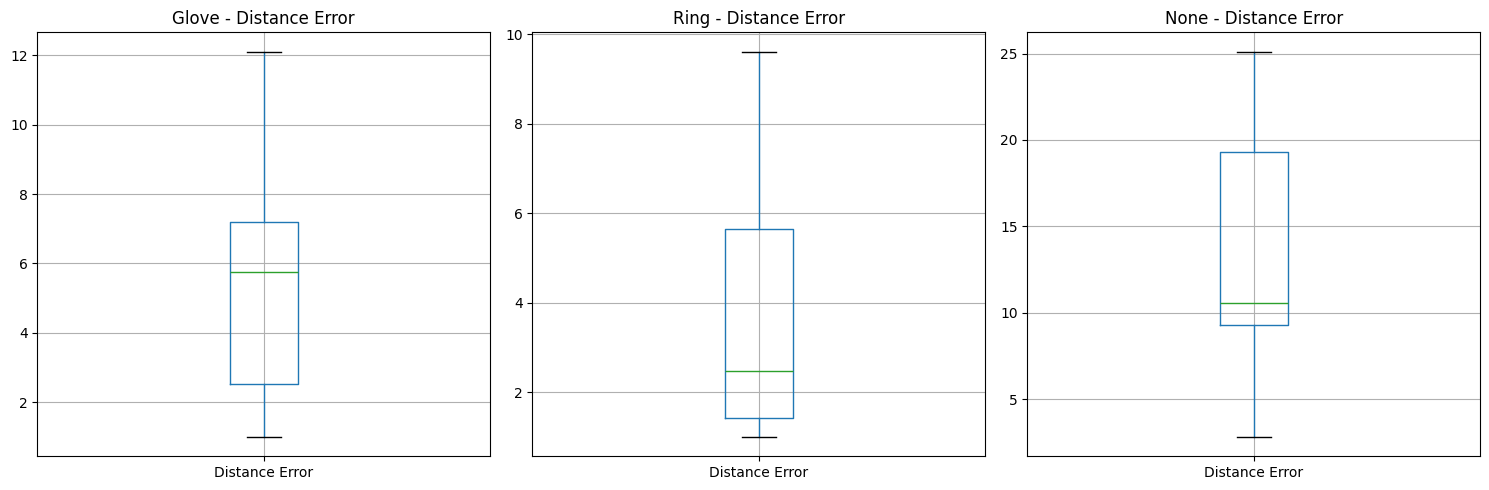

In [ ]:
# 3. check for outliers with boxplot
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 3, figsize=(15, 5))

glove_df.boxplot(column='Distance Error', ax=axes[0])
axes[0].set_title('Glove - Distance Error')

ring_df.boxplot(column='Distance Error', ax=axes[1])
axes[1].set_title('Ring - Distance Error')

none_df.boxplot(column='Distance Error', ax=axes[2])
axes[2].set_title('None - Distance Error')

plt.tight_layout()
plt.show()

Test normality assumption:
Based on shapiro-wilk, skew, kurtosis, and Q-Q plot visualizations, the normality is not approximately normal for the distance error of each haptic device.

In [ ]:
# 4. shapiro wilk test for normality of Distance Error
import pingouin

print("Glove")
print(pingouin.normality(glove_df['Distance Error']))

print("Ring")
print(pingouin.normality(ring_df['Distance Error']))

print("None")
print(pingouin.normality(none_df['Distance Error']))

Glove
                       W      pval  normal
Distance Error  0.952448  0.675355    True
Ring
                       W      pval  normal
Distance Error  0.808323  0.012107   False
None
                       W      pval  normal
Distance Error  0.942654  0.552186    True


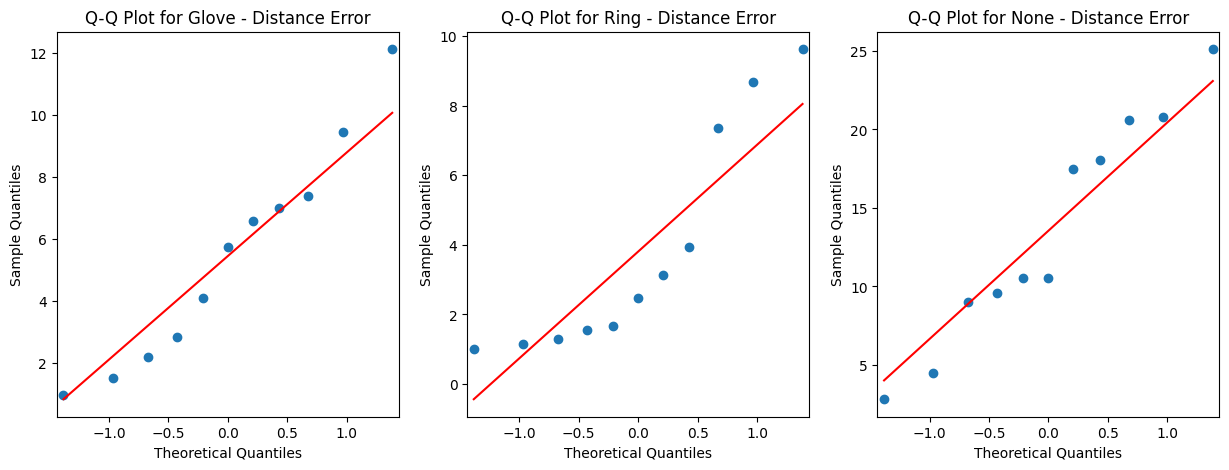

In [ ]:
# 4. Q-Q plot showing normalty for distance error
import matplotlib.pyplot as plt
import statsmodels.api as sm

fig, axes = plt.subplots(1, 3, figsize=(15, 5))

sm.qqplot(glove_df['Distance Error'], line='s', ax=axes[0])
axes[0].set_title('Q-Q Plot for Glove - Distance Error')

sm.qqplot(ring_df['Distance Error'], line='s', ax=axes[1])
axes[1].set_title('Q-Q Plot for Ring - Distance Error')

sm.qqplot(none_df['Distance Error'], line='s', ax=axes[2])
axes[2].set_title('Q-Q Plot for None - Distance Error')

plt.show()

5. Test sphericity:
Since normality was not met and a repeated measures anova is not appropriate, it is not necessary to test sphericity.

Statistical Tests:

Based on the assumptions for the one-way repeated measures Anova not being met, the friedman test is the most appropriate alternative.

In [ ]:
# Friedman test to check if differences exist between the glove, ring, and no device for Distance Error.

pingouin.friedman(data=df, dv='Distance Error', within='Device', subject='User')

,Source,W,ddof1,Q,p-unc
Friedman,Device,0.603306,2,13.272727,0.001312


p-value < .05 -> significant

effect size = .60 -> high agreement


Post Hoc Tests:

In [ ]:
distance_wide = df.pivot(index='User', columns='Device', values='Distance Error')
distance_wide

Device,glove,none,ring
User,,,
1,4.109457,10.552650,3.132510
2,6.591493,25.114277,9.617000
3,5.754780,4.512380,1.538803
4,12.106930,10.529363,8.675640
5,2.217527,20.602873,0.999563
6,6.986343,9.583810,3.945810
7,7.387590,20.807130,7.365710
8,9.454687,9.023483,1.655343
9,1.532423,18.065663,1.300070


Check Wilcoxon Signed-rank assumptions:
1. dependent variable is ordinal or continuous
2. independent variable is 2 categorical related groups
3. distribution of differences between groups are approximately symmetrical
4. results are independent within pairs

In [ ]:
# 3. check wilcoxon assumption of symmetrical distribution differences

distance_wide['diff_glove_ring'] = distance_wide['glove'] - distance_wide['ring']
distance_wide['diff_glove_none'] = distance_wide['glove'] - distance_wide['none']
distance_wide['diff_ring_none']  = distance_wide['ring']  - distance_wide['none']

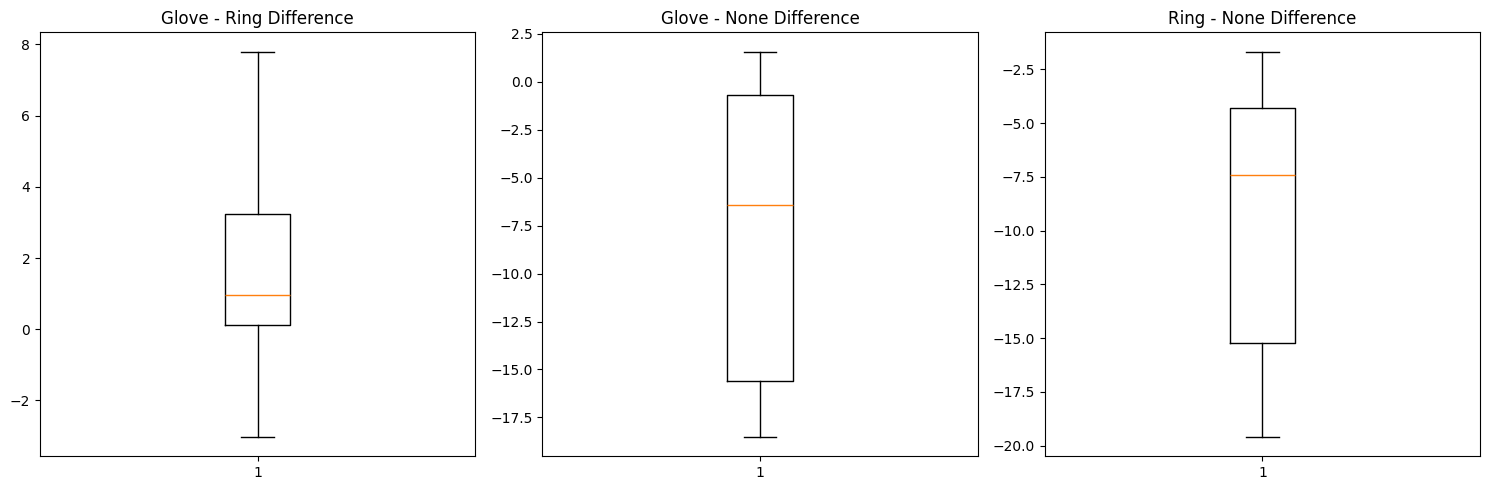

In [ ]:
# 3. plot distribution of differences
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

axes[0].boxplot(distance_wide['diff_glove_ring'])
axes[0].set_title('Glove - Ring Difference')

axes[1].boxplot(distance_wide['diff_glove_none'])
axes[1].set_title('Glove - None Difference')

axes[2].boxplot(distance_wide['diff_ring_none'])
axes[2].set_title('Ring - None Difference')

plt.tight_layout()
plt.show()

distribution of differences are approximately symmetrical, meaning a wilcoxon test is appropriate

In [ ]:
# assumptions are met, run wilcoxon test

import pingouin as pg


glove_distance_array = glove_df['Distance Error'].values
ring_distance_array = ring_df['Distance Error'].values
none_distance_array = none_df['Distance Error'].values


distance_GR_result = pg.wilcoxon(glove_distance_array, ring_distance_array, alternative='two-sided')
print('Glove vs Ring:')
print(distance_GR_result)
print('----------------------------------------------------------')

distance_GN_result = pg.wilcoxon(glove_distance_array, none_distance_array, alternative='two-sided')
print('Glove vs None:')
print(distance_GN_result)
print('----------------------------------------------------------')

distance_RN_result = pg.wilcoxon(ring_distance_array, none_distance_array, alternative='two-sided')
print('Ring vs None:')
print(distance_RN_result)

Glove vs Ring:
          W-val alternative     p-val       RBC      CLES
Wilcoxon    9.0   two-sided  0.032227  0.727273  0.628099
----------------------------------------------------------
Glove vs None:
          W-val alternative     p-val       RBC      CLES
Wilcoxon    6.0   two-sided  0.013672 -0.818182  0.157025
----------------------------------------------------------
Ring vs None:
          W-val alternative     p-val  RBC      CLES
Wilcoxon    0.0   two-sided  0.000977 -1.0  0.082645


In [ ]:
# BY correction for false discovery rate
distance_pvals = [distance_GR_result['p-val'][0], distance_GN_result['p-val'][0],distance_RN_result['p-val'][0]]
adjusted_distance = scipy.stats.false_discovery_control(distance_pvals, method='by')
labels = ['Glove vs Ring ', 'Glove vs None ', 'Ring vs None ']
for label, p in zip(labels, adjusted_distance):
    print(f"{label}: {p:.3f}")

Glove vs Ring : 0.059
Glove vs None : 0.038
Ring vs None : 0.005


/tmp/ipython-input-1003943867.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  distance_pvals = [distance_GR_result['p-val'][0], distance_GN_result['p-val'][0],distance_RN_result['p-val'][0]]


In [ ]:
# display results

x_pvals = [distance_GR_result['p-val'][0], distance_GN_result['p-val'][0],distance_RN_result['p-val'][0]]
adjusted_distance = scipy.stats.false_discovery_control(pvals, method='by')
labels = ['Glove vs Ring ', 'Glove vs None ', 'Ring vs None ']
for label, p in zip(labels, adjusted_distance):
    print(f"{label}: {p:.3f}")



      Comparison  Adjusted_p_value_BY
0  Glove vs Ring             0.059082
1  Glove vs None             0.037598
2   Ring vs None             0.005371


Glove vs Ring Distance Error:

p-value > .05 -> no significant difference

Effect size: RBC = .727 -> large effect  CLES = .628 -> glove has a larger distance error 63% of the time.


Glove vs None Distance Error:

p-value < .05 -> significant difference

Effect size: RBC = -.818 -> large effect size, CLES = .157 -> glove has a larger distance error 16% of the time

Ring vs None Distance Error:

p-value < 0.05 -> significant difference

Effect size: RBC = -1 -> very large effect (perfect), CLES = .083 -> ring has a larger distance error 8% of the time

# Time Calculations

Check one-way repeated measures Anova assumptions:

1. Dependent variable is continous
2. independent variable is 2 or more categorical related groups
3. There are no significant outliers
4. Two or more related groups being measured
5. Normality of ditribution
6. Sphericity (variances of differences between groups should be approximately equal)

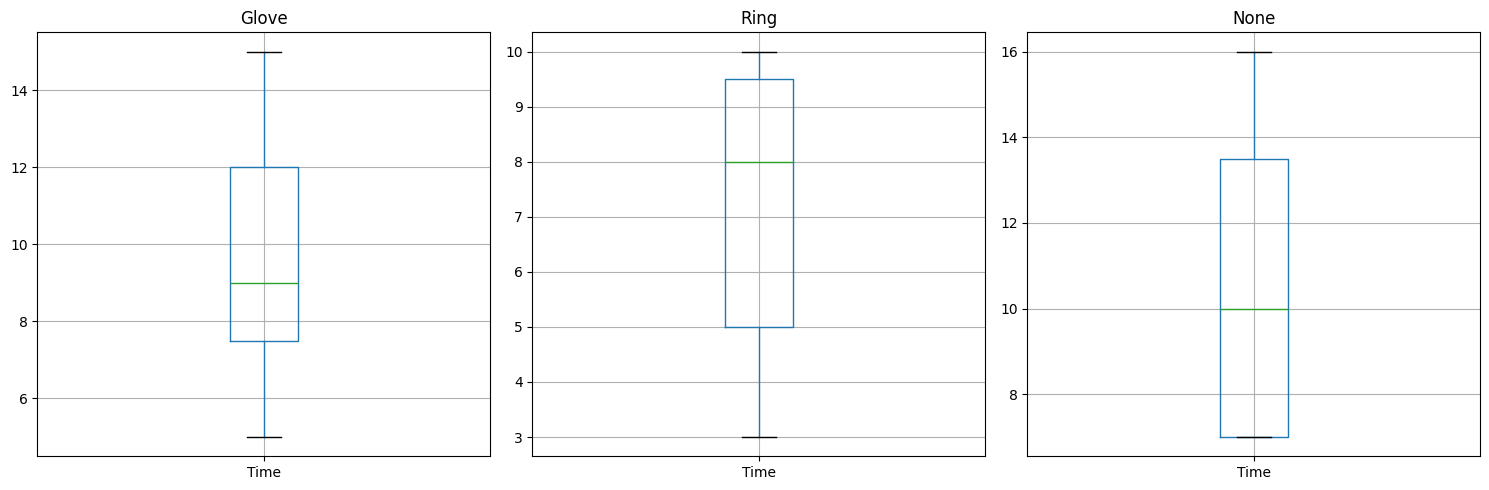

In [ ]:
# 3. check for outliers with boxplots
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

glove_df.boxplot(column='Time', ax=axes[0])
axes[0].set_title('Glove')

ring_df.boxplot(column='Time', ax=axes[1])
axes[1].set_title('Ring')

none_df.boxplot(column='Time', ax=axes[2])
axes[2].set_title('None')

plt.tight_layout()
plt.show()

In [ ]:
# 4. check shapiro wilk normality test

print("Glove")
print(pingouin.normality(glove_df['Time']))

print("Ring")
print(pingouin.normality(ring_df['Time']))

print("None")
print(pingouin.normality(none_df['Time']))

Glove
             W      pval  normal
Time  0.964618  0.827641    True
Ring
             W      pval  normal
Time  0.873981  0.087193    True
None
             W      pval  normal
Time  0.873696  0.086464    True


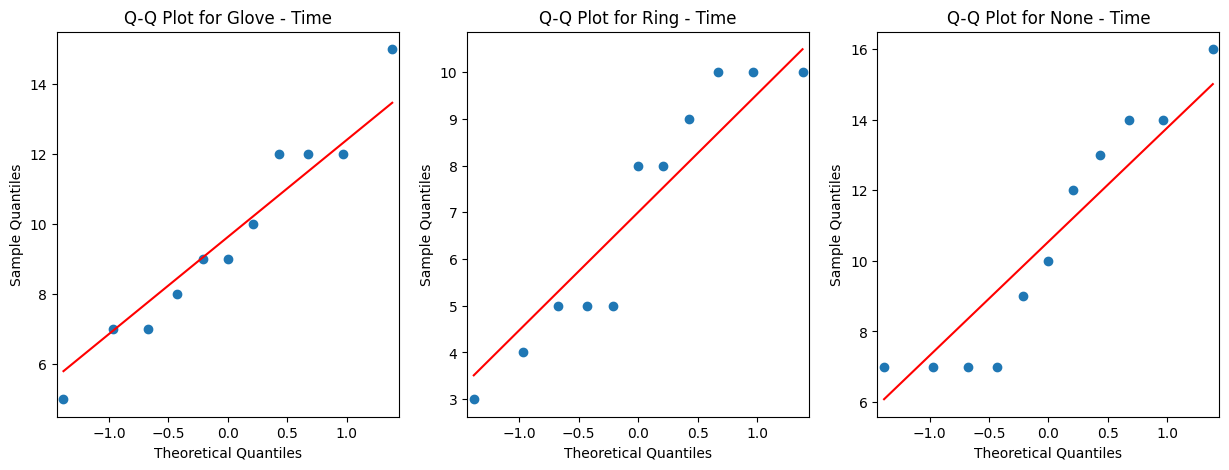

In [ ]:
# 4. visualize normality with a Q-Q plot

fig, axes = plt.subplots(1, 3, figsize=(15, 5))

sm.qqplot(glove_df['Time'], line='s', ax=axes[0])
axes[0].set_title('Q-Q Plot for Glove - Time')

sm.qqplot(ring_df['Time'], line='s', ax=axes[1])
axes[1].set_title('Q-Q Plot for Ring - Time')

sm.qqplot(none_df['Time'], line='s', ax=axes[2])
axes[2].set_title('Q-Q Plot for None - Time')

plt.show()

In [ ]:
time_wide = df.pivot(index='User', columns='Device', values='Time')
time_wide

Device,glove,none,ring
User,,,
1,12,12,5
2,9,16,10
3,7,13,8
4,12,7,9
5,8,14,10
6,5,7,4
7,9,10,5
8,12,9,3
9,10,14,8


In [ ]:
# 5. testing sphericity
pingouin.sphericity(time_wide)

SpherResults(spher=True, W=np.float64(0.7437717775677997), chi2=np.float64(2.664189376087884), dof=2, pval=np.float64(0.2639238437635863))

Check Assumptions for paired t-test:
1. Subjects are independent
2. Each paired measurement comes from the same subject
3. Measured differences are normally distributed

In [ ]:
# 3. format data for testing distribution of differences
time_wide['G/R Difference'] = time_wide['glove'] - time_wide['ring']
time_wide['G/N Difference'] = time_wide['glove'] - time_wide['none']
time_wide['R/N Difference'] = time_wide['ring'] - time_wide['none']

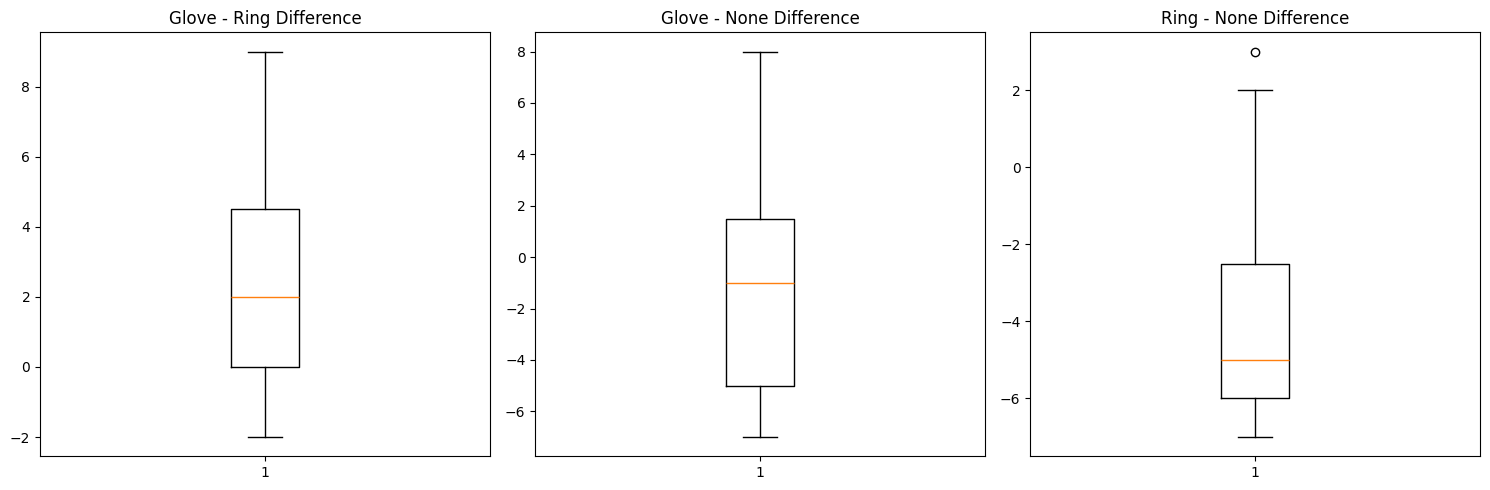

In [ ]:
# 3. visualization
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

axes[0].boxplot(time_wide['G/R Difference'])
axes[0].set_title('Glove - Ring Difference')

axes[1].boxplot(time_wide['G/N Difference'])
axes[1].set_title('Glove - None Difference')

axes[2].boxplot(time_wide['R/N Difference'])
axes[2].set_title('Ring - None Difference')

plt.tight_layout()
plt.show()

In [ ]:
# 3. test normality of distribution of differences

print("Glove/Ring difference")
print(pingouin.normality(time_wide['G/R Difference']))

print("Ring/None difference")
print(pingouin.normality(time_wide['R/N Difference']))

print("glove/None difference")
print(pingouin.normality(time_wide['G/N Difference']))



Glove/Ring difference
                       W      pval  normal
G/R Difference  0.960017  0.771899    True
Ring/None difference
                       W      pval  normal
R/N Difference  0.842041  0.033586   False
glove/None difference
                       W      pval  normal
G/N Difference  0.947786  0.615798    True


Despite repeated measures anova assumptions being met, the non normal distribution of differences between the ring device and bare hand mean a parametric alternative is more appropriate.

Statistical tests:

In [ ]:
# Friedman test to check if differences exist between the glove, ring, and no device for time.

pingouin.friedman(data=df, dv='Time', within='Device', subject='User')

,Source,W,ddof1,Q,p-unc
Friedman,Device,0.268398,2,5.904762,0.052215


p-value > .05 -> not significant

Effect size: W = .268 -> fair agreement

#Trials Calculations

Check one-way repeated measures Anova assumptions:

1. Dependent variable is continous
2. independent variable is 2 or more categorical related groups
3. There are no significant outliers
4. Two or more related groups being measured
5. Normality of ditribution
6. Sphericity (variances of differences between groups should be approximately equal)

In [ ]:
trials_wide = df.pivot(index='User', columns='Device', values='Trials')
trials_wide

Device,glove,none,ring
User,,,
1,2.333333,1.0,1.333333
2,1.666667,4.0,2.333333
3,1.666667,1.0,2.000000
4,3.000000,1.0,1.666667
5,2.333333,2.0,2.666667
6,1.333333,1.0,1.000000
7,2.000000,2.0,1.333333
8,2.666667,2.0,1.000000
9,1.000000,2.0,1.000000


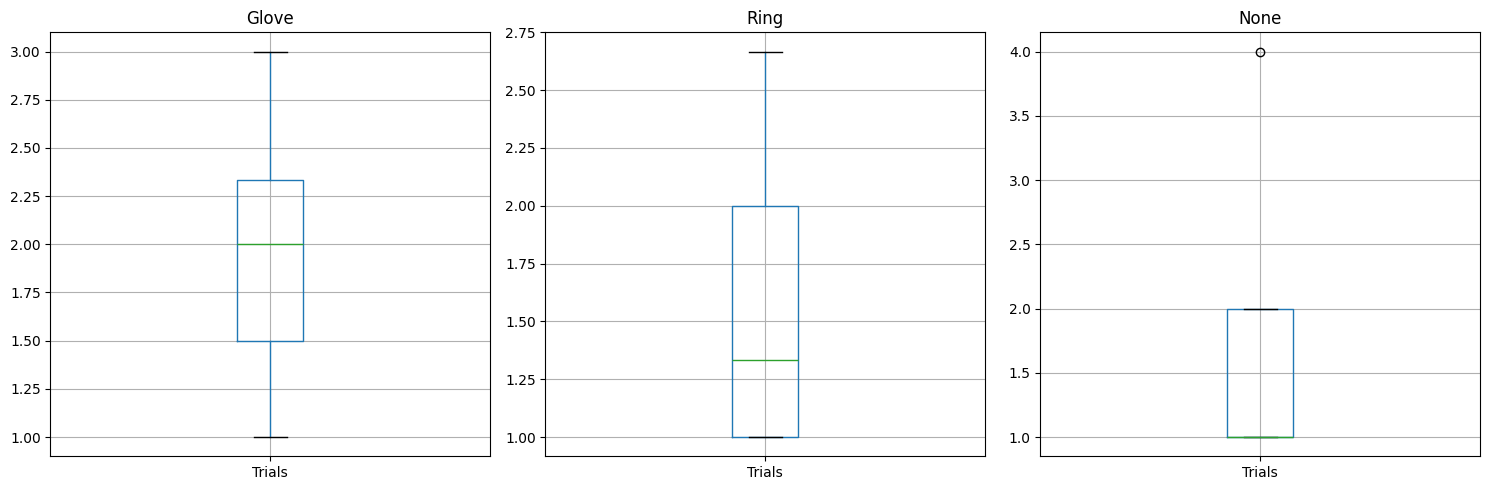

In [ ]:
# 3. check for outliers
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 3, figsize=(15, 5))

glove_df.boxplot(column='Trials', ax=axes[0])
axes[0].set_title('Glove')

ring_df.boxplot(column='Trials', ax=axes[1])
axes[1].set_title('Ring')

none_df.boxplot(column='Trials', ax=axes[2])
axes[2].set_title('None')

plt.tight_layout()
plt.show()

In [ ]:
# 5. shapiro wilk normality test

print("Glove")
print(pingouin.normality(trials_wide['glove']))

print("Ring")
print(pingouin.normality(trials_wide['ring']))

print("None")
print(pingouin.normality(trials_wide['none']))

Glove
              W      pval  normal
glove  0.960422  0.776942    True
Ring
             W      pval  normal
ring  0.874102  0.087505    True
None
             W      pval  normal
none  0.702787  0.000508   False


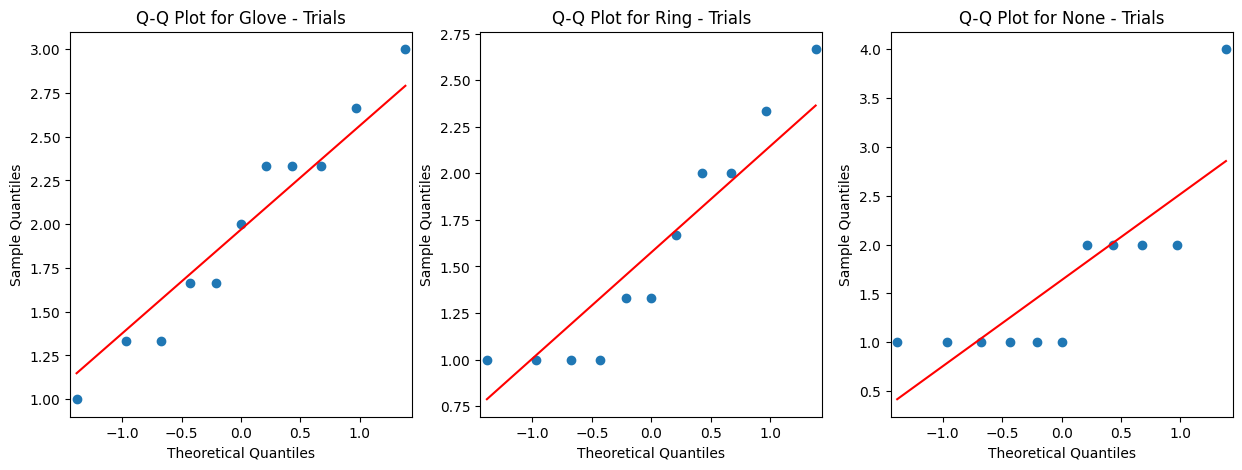

In [ ]:
# 5. visualize normality with Q-Q plot

fig, axes = plt.subplots(1, 3, figsize=(15, 5))

sm.qqplot(glove_df['Trials'], line='s', ax=axes[0])
axes[0].set_title('Q-Q Plot for Glove - Trials')

sm.qqplot(ring_df['Trials'], line='s', ax=axes[1])
axes[1].set_title('Q-Q Plot for Ring - Trials')

sm.qqplot(none_df['Trials'], line='s', ax=axes[2])
axes[2].set_title('Q-Q Plot for None - Trials')

plt.show()

6. Test sphericity:
Since normality was not met and a repeated measures anova is not appropriate, it is not necessary to test sphericity.

Statistical tests:

In [ ]:
# Friedman test, to compare the three devices across three feedback modalities (number of trials, time, and distance error) to check for any significant differences.

pingouin.friedman(data=df, dv='Trials', within='Device', subject='User')

,Source,W,ddof1,Q,p-unc
Friedman,Device,0.179545,2,3.95,0.138761


p-value > .05 -> not significant
Effect size: W = .180 -> slight agreement

Findings

In [ ]:
# table results from significance testing APA rounding
summary_findings = {
    'Comparison':['Number of Trials','Time','Distance Error'],
    'Rings vs Glove': ['.138','.059','.034'],
    'Glove vs Bare Hand': ['.138', '.544', '.027'],
    'Rings vs Bare Hand': ['.138', '.016', '.003']
}

summary_findings = pd.DataFrame(summary_findings)
summary_findings_transposed_df = summary_findings.set_index('Comparison').transpose()

display(summary_findings_transposed_df)

Comparison,Number of Trials,Time,Distance Error
Rings vs Glove,.138,.059,.034
Glove vs Bare Hand,.138,.544,.027
Rings vs Bare Hand,.138,.016,.003


#Expanding to understand the impact of each axis for distance error

In [ ]:
#read data

dfc = pd.read_csv('ReplicationData_Combined.csv')
dfc

,User,Axis,Device,Trials,Distance Error,Time
0,1,x,glove,3,2.36405,6
1,2,x,glove,2,1.19163,16
2,3,x,glove,3,13.75403,3
3,4,x,glove,3,2.61311,21
4,5,x,glove,2,2.50125,9
...,...,...,...,...,...,...
94,7,z,none,3,1.27098,5
95,8,z,none,1,11.60145,9
96,9,z,none,2,20.21713,10
97,10,z,none,1,0.69219,5


In [ ]:
#create variable names to access testing conditions

#glove
glove_x = dfc[(dfc['Device'] == 'glove') & (dfc['Axis'] == 'x')]
glove_y = dfc[(dfc['Device'] == 'glove') & (dfc['Axis'] == 'y')]
glove_z = dfc[(dfc['Device'] == 'glove') & (dfc['Axis'] == 'z')]

#ring
ring_x = dfc[(dfc['Device'] == 'ring') & (dfc['Axis'] == 'x')]
ring_y = dfc[(dfc['Device'] == 'ring') & (dfc['Axis'] == 'y')]
ring_z = dfc[(dfc['Device'] == 'ring') & (dfc['Axis'] == 'z')]

#none
none_x = dfc[(dfc['Device'] == 'none') & (dfc['Axis'] == 'x')]
none_y = dfc[(dfc['Device'] == 'none') & (dfc['Axis'] == 'y')]
none_z = dfc[(dfc['Device'] == 'none') & (dfc['Axis'] == 'z')]

In [ ]:
#distance error calculations (mean, median, SD, IQR, SE)

# glove distance error calculations (mean, median, SD, IQR, SE)
# glove distance error mean
mean_distance_glove_x = glove_x['Distance Error'].mean()
mean_distance_glove_y = glove_y['Distance Error'].mean()
mean_distance_glove_z = glove_z['Distance Error'].mean()

# glove distance error median
median_distance_glove_x = glove_x['Distance Error'].median()
median_distance_glove_y = glove_y['Distance Error'].median()
median_distance_glove_z = glove_z['Distance Error'].median()

# glove SD distance error
sd_distance_glove_x = glove_x['Distance Error'].std()
sd_distance_glove_y = glove_y['Distance Error'].std()
sd_distance_glove_z = glove_z['Distance Error'].std()

# glove IQR distance error
iqr_distance_glove_x = glove_x['Distance Error'].quantile(0.75) - glove_x['Distance Error'].quantile(0.25)
iqr_distance_glove_y = glove_y['Distance Error'].quantile(0.75) - glove_y['Distance Error'].quantile(0.25)
iqr_distance_glove_z = glove_z['Distance Error'].quantile(0.75) - glove_z['Distance Error'].quantile(0.25)

# glove SE distance error
se_distance_glove_x = glove_x['Distance Error'].sem()
se_distance_glove_y = glove_y['Distance Error'].sem()
se_distance_glove_z = glove_z['Distance Error'].sem()


# ring distance error calculations (mean, median, SD, IQR, SE)
# ring distance error mean
mean_distance_ring_x = ring_x['Distance Error'].mean()
mean_distance_ring_y = ring_y['Distance Error'].mean()
mean_distance_ring_z = ring_z['Distance Error'].mean()

# ring distance error median
median_distance_ring_x = ring_x['Distance Error'].median()
median_distance_ring_y = ring_y['Distance Error'].median()
median_distance_ring_z = ring_z['Distance Error'].median()

# ring distance error standard deviation
sd_distance_ring_x = ring_x['Distance Error'].std()
sd_distance_ring_y = ring_y['Distance Error'].std()
sd_distance_ring_z = ring_z['Distance Error'].std()

# ring distance error IQR
iqr_distance_ring_x = ring_x['Distance Error'].quantile(0.75) - ring_x['Distance Error'].quantile(0.25)
iqr_distance_ring_y = ring_y['Distance Error'].quantile(0.75) - ring_y['Distance Error'].quantile(0.25)
iqr_distance_ring_z = ring_z['Distance Error'].quantile(0.75) - ring_z['Distance Error'].quantile(0.25)

# ring distance error SE
se_distance_ring_x = ring_x['Distance Error'].sem()
se_distance_ring_y = ring_y['Distance Error'].sem()
se_distance_ring_z = ring_z['Distance Error'].sem()


# none (bare hand) distance error calculations (mean, median, SD, IQR, SE)
#none/bare hand distance error mean
mean_distance_none_x = none_x['Distance Error'].mean()
mean_distance_none_y = none_y['Distance Error'].mean()
mean_distance_none_z = none_z['Distance Error'].mean()

#none distance error median
median_distance_none_x = none_x['Distance Error'].median()
median_distance_none_y = none_y['Distance Error'].median()
median_distance_none_z = none_z['Distance Error'].median()

#none distance error standard deviation
sd_distance_none_x = none_x['Distance Error'].std()
sd_distance_none_y = none_y['Distance Error'].std()
sd_distance_none_z = none_z['Distance Error'].std()

#none IQR distance error
iqr_distance_none_x = none_x['Distance Error'].quantile(0.75) - none_x['Distance Error'].quantile(0.25)
iqr_distance_none_y = none_y['Distance Error'].quantile(0.75) - none_y['Distance Error'].quantile(0.25)
iqr_distance_none_z = none_z['Distance Error'].quantile(0.75) - none_z['Distance Error'].quantile(0.25)

#none distance error SE
se_distance_none_x = none_x['Distance Error'].sem()
se_distance_none_y = none_y['Distance Error'].sem()
se_distance_none_z = none_z['Distance Error'].sem()

In [ ]:
#trials calculations (mean, median, SD, IQR, SE)

# glove trials calculations (mean, median, SD, IQR, SE)
# glove trials mean
mean_trials_glove_x = glove_x['Trials'].mean()
mean_trials_glove_y = glove_y['Trials'].mean()
mean_trials_glove_z = glove_z['Trials'].mean()

# glove trials median
median_trials_glove_x = glove_x['Trials'].median()
median_trials_glove_y = glove_y['Trials'].median()
median_trials_glove_z = glove_z['Trials'].median()

# glove SD trials
sd_trials_glove_x = glove_x['Trials'].std()
sd_trials_glove_y = glove_y['Trials'].std()
sd_trials_glove_z = glove_z['Trials'].std()

# glove IQR trials
iqr_trials_glove_x = glove_x['Trials'].quantile(0.75) - glove_x['Trials'].quantile(0.25)
iqr_trials_glove_y = glove_y['Trials'].quantile(0.75) - glove_y['Trials'].quantile(0.25)
iqr_trials_glove_z = glove_z['Trials'].quantile(0.75) - glove_z['Trials'].quantile(0.25)

# glove SE trials
se_trials_glove_x = glove_x['Trials'].sem()
se_trials_glove_y = glove_y['Trials'].sem()
se_trials_glove_z = glove_z['Trials'].sem()


# ring trials calculations (mean, median, SD, IQR, SE)
# ring trials mean
mean_trials_ring_x = ring_x['Trials'].mean()
mean_trials_ring_y = ring_y['Trials'].mean()
mean_trials_ring_z = ring_z['Trials'].mean()

# ring trials median
median_trials_ring_x = ring_x['Trials'].median()
median_trials_ring_y = ring_y['Trials'].median()
median_trials_ring_z = ring_z['Trials'].median()

# ring trials standard deviation
sd_trials_ring_x = ring_x['Trials'].std()
sd_trials_ring_y = ring_y['Trials'].std()
sd_trials_ring_z = ring_z['Trials'].std()

# ring IQR trials
iqr_trials_ring_x = ring_x['Trials'].quantile(0.75) - ring_x['Trials'].quantile(0.25)
iqr_trials_ring_y = ring_y['Trials'].quantile(0.75) - ring_y['Trials'].quantile(0.25)
iqr_trials_ring_z = ring_z['Trials'].quantile(0.75) - ring_z['Trials'].quantile(0.25)

# ring trials SE
se_trials_ring_x = ring_x['Trials'].sem()
se_trials_ring_y = ring_y['Trials'].sem()
se_trials_ring_z = ring_z['Trials'].sem()


# none (bare hand) trials calculations (mean, median, SD, IQR, SE)
#none/bare hand trials mean
mean_trials_none_x = none_x['Trials'].mean()
mean_trials_none_y = none_y['Trials'].mean()
mean_trials_none_z = none_z['Trials'].mean()

#none trials median
median_trials_none_x = none_x['Trials'].median()
median_trials_none_y = none_y['Trials'].median()
median_trials_none_z = none_z['Trials'].median()

#none trials standard deviation
sd_trials_none_x = none_x['Trials'].std()
sd_trials_none_y = none_y['Trials'].std()
sd_trials_none_z = none_z['Trials'].std()

#none IQR trials
iqr_trials_none_x = none_x['Trials'].quantile(0.75) - none_x['Trials'].quantile(0.25)
iqr_trials_none_y = none_y['Trials'].quantile(0.75) - none_y['Trials'].quantile(0.25)
iqr_trials_none_z = none_z['Trials'].quantile(0.75) - none_z['Trials'].quantile(0.25)

#none trials SE
se_trials_none_x = none_x['Trials'].sem()
se_trials_none_y = none_y['Trials'].sem()
se_trials_none_z = none_z['Trials'].sem()

In [ ]:
#time calculations (mean, median, SD, IQR, SE)

# glove time calculations (mean, median, SD, IQR, SE)
# glove time mean
mean_time_glove_x = glove_x['Time'].mean()
mean_time_glove_y = glove_y['Time'].mean()
mean_time_glove_z = glove_z['Time'].mean()

# glove time median
median_time_glove_x = glove_x['Time'].median()
median_time_glove_y = glove_y['Time'].median()
median_time_glove_z = glove_z['Time'].median()

# glove SD time
sd_time_glove_x = glove_x['Time'].std()
sd_time_glove_y = glove_y['Time'].std()
sd_time_glove_z = glove_z['Time'].std()

# glove IQR time
iqr_time_glove_x = glove_x['Time'].quantile(0.75) - glove_x['Time'].quantile(0.25)
iqr_time_glove_y = glove_y['Time'].quantile(0.75) - glove_y['Time'].quantile(0.25)
iqr_time_glove_z = glove_z['Time'].quantile(0.75) - glove_z['Time'].quantile(0.25)

# glove SE time
se_time_glove_x = glove_x['Time'].sem()
se_time_glove_y = glove_y['Time'].sem()
se_time_glove_z = glove_z['Time'].sem()



# ring time calculations (mean, median, SD, IQR, SE)
# ring time mean
mean_time_ring_x = ring_x['Time'].mean()
mean_time_ring_y = ring_y['Time'].mean()
mean_time_ring_z = ring_z['Time'].mean()

# ring time median
median_time_ring_x = ring_x['Time'].median()
median_time_ring_y = ring_y['Time'].median()
median_time_ring_z = ring_z['Time'].median()

# ring time standard deviation
sd_time_ring_x = ring_x['Time'].std()
sd_time_ring_y = ring_y['Time'].std()
sd_time_ring_z = ring_z['Time'].std()

# ring IQR time
iqr_time_ring_x = ring_x['Time'].quantile(0.75) - ring_x['Time'].quantile(0.25)
iqr_time_ring_y = ring_y['Time'].quantile(0.75) - ring_y['Time'].quantile(0.25)
iqr_time_ring_z = ring_z['Time'].quantile(0.75) - ring_z['Time'].quantile(0.25)

# ring time SE
se_time_ring_x = ring_x['Time'].sem()
se_time_ring_y = ring_y['Time'].sem()
se_time_ring_z = ring_z['Time'].sem()



# none (bare hand) time calculations (mean, median, SD, IQR, SE)
#none/bare hand time mean
mean_time_none_x = none_x['Time'].mean()
mean_time_none_y = none_y['Time'].mean()
mean_time_none_z = none_z['Time'].mean()

#none time median
median_time_none_x = none_x['Time'].median()
median_time_none_y = none_y['Time'].median()
median_time_none_z = none_z['Time'].median()

#none time standard deviation
sd_time_none_x = none_x['Time'].std()
sd_time_none_y = none_y['Time'].std()
sd_time_none_z = none_z['Time'].std()

#none IQR time
iqr_time_none_x = none_x['Time'].quantile(0.75) - none_x['Time'].quantile(0.25)
iqr_time_none_y = none_y['Time'].quantile(0.75) - none_y['Time'].quantile(0.25)
iqr_time_none_z = none_z['Time'].quantile(0.75) - none_z['Time'].quantile(0.25)

#none time SE
se_time_none_x = none_x['Time'].sem()
se_time_none_y = none_y['Time'].sem()
se_time_none_z = none_z['Time'].sem()

In [ ]:
# table showing stats overview for glove device

summary_glove_data = {
    'Device':['Glove','','','','','','','',''],
    'Axis': ['','x','', '','y','', '','z',''],
    'Metric': ['Distance Error', 'Trials','Time','Distance Error', 'Trials','Time','Distance Error', 'Trials','Time'],
    'Mean': [mean_distance_glove_x, mean_trials_glove_x, mean_time_glove_x, mean_distance_glove_y, mean_trials_glove_y, mean_time_glove_y, mean_distance_glove_z, mean_trials_glove_z, mean_time_glove_z],
     'Median': [median_distance_glove_x, median_trials_glove_x, median_time_glove_x, median_distance_glove_y, median_trials_glove_y, median_time_glove_y, median_distance_glove_z, median_trials_glove_z, median_time_glove_z],
    'SD': [sd_distance_glove_x, sd_trials_glove_x, sd_time_glove_x, sd_distance_glove_y, sd_trials_glove_y, sd_time_glove_y, sd_distance_glove_z, sd_trials_glove_z, sd_time_glove_z],
    "IQR":[iqr_distance_glove_x, iqr_trials_glove_x, iqr_time_glove_x, iqr_distance_glove_y, iqr_trials_glove_y, iqr_time_glove_y, iqr_distance_glove_z, iqr_trials_glove_z, iqr_time_glove_z],
    "SE": [se_distance_glove_x, se_trials_glove_x, se_time_glove_x, se_distance_glove_y, se_trials_glove_y, se_time_glove_y, se_distance_glove_z, se_trials_glove_z, se_time_glove_z]
}

summary_glove_df = pd.DataFrame(summary_glove_data).round(1)
summary_glove_transposed_df = summary_glove_df.set_index('Device').transpose()
summary_glove_transposed_df.index.name = None

display(summary_glove_transposed_df)

Device,Glove,,,,,,,,
Axis,,x,,,y,,,z,
Metric,Distance Error,Trials,Time,Distance Error,Trials,Time,Distance Error,Trials,Time
Mean,5.1,2.5,12.8,9.5,1.6,11.4,1.7,1.9,4.8
Median,2.5,3.0,11.0,4.9,1.0,10.0,0.9,1.0,4.0
SD,6.4,0.8,7.0,10.8,0.8,7.1,2.1,1.3,2.3
IQR,2.0,1.0,10.0,16.7,1.0,4.0,2.1,1.5,3.0
SE,1.9,0.2,2.1,3.3,0.2,2.2,0.6,0.4,0.7


In [ ]:
# table showing stats overview for ring device

summary_ring_data = {
    'Device':['Ring','','','','','','','',''],
    'Axis': ['','x','', '','y','', '','z',''],
    'Metric': ['Distance Error', 'Trials','Time','Distance Error', 'Trials','Time','Distance Error', 'Trials','Time'],
    'Mean': [
        mean_distance_ring_x, mean_trials_ring_x, mean_time_ring_x,
        mean_distance_ring_y, mean_trials_ring_y, mean_time_ring_y,
        mean_distance_ring_z, mean_trials_ring_z, mean_time_ring_z
    ],
    'Median': [
        median_distance_ring_x, median_trials_ring_x, median_time_ring_x,
        median_distance_ring_y, median_trials_ring_y, median_time_ring_y,
        median_distance_ring_z, median_trials_ring_z, median_time_ring_z
    ],
    'SD': [
        sd_distance_ring_x, sd_trials_ring_x, sd_time_ring_x,
        sd_distance_ring_y, sd_trials_ring_y, sd_time_ring_y,
        sd_distance_ring_z, sd_trials_ring_z, sd_time_ring_z
    ],
    "IQR":[
        iqr_distance_ring_x, iqr_trials_ring_x, iqr_time_ring_x,
        iqr_distance_ring_y, iqr_trials_ring_y, iqr_time_ring_y,
        iqr_distance_ring_z, iqr_trials_ring_z, iqr_time_ring_z
    ],
    "SE": [
        se_distance_ring_x, se_trials_ring_x, se_time_ring_x,
        se_distance_ring_y, se_trials_ring_y, se_time_ring_y,
        se_distance_ring_z, se_trials_ring_z, se_time_ring_z
    ]
}

summary_ring_df = pd.DataFrame(summary_ring_data).round(1)
summary_ring_transposed_df = summary_ring_df.set_index('Device').transpose()
summary_ring_transposed_df.index.name = None

display(summary_ring_transposed_df)

Device,Ring,,,,,,,,
Axis,,x,,,y,,,z,
Metric,Distance Error,Trials,Time,Distance Error,Trials,Time,Distance Error,Trials,Time
Mean,2.9,1.5,8.7,5.5,1.9,7.3,3.1,1.3,4.5
Median,2.0,1.0,10.0,2.8,2.0,7.0,2.0,1.0,4.0
SD,3.3,0.7,4.6,6.1,1.0,2.8,2.9,0.5,1.6
IQR,2.0,1.0,7.0,7.1,1.5,2.5,1.6,0.5,2.5
SE,1.0,0.2,1.4,1.9,0.3,0.8,0.9,0.1,0.5


In [ ]:
# table showing stats overview for no device

summary_none_data = {
    'Device':['None','','','','','','','',''],
    'Axis': ['','x','', '','y','', '','z',''],
    'Metric': ['Distance Error', 'Trials','Time','Distance Error', 'Trials','Time','Distance Error', 'Trials','Time'],
    'Mean': [
        mean_distance_none_x, mean_trials_none_x, mean_time_none_x,
        mean_distance_none_y, mean_trials_none_y, mean_time_none_y,
        mean_distance_none_z, mean_trials_none_z, mean_time_none_z
    ],
    'Median': [
        median_distance_none_x, median_trials_none_x, median_time_none_x,
        median_distance_none_y, median_trials_none_y, median_time_none_y,
        median_distance_none_z, median_trials_none_z, median_time_none_z
    ],
    'SD': [
        sd_distance_none_x, sd_trials_none_x, sd_time_none_x,
        sd_distance_none_y, sd_trials_none_y, sd_time_none_y,
        sd_distance_none_z, sd_trials_none_z, sd_time_none_z
    ],
    "IQR":[
        iqr_distance_none_x, iqr_trials_none_x, iqr_time_none_x,
        iqr_distance_none_y, iqr_trials_none_y, iqr_time_none_y,
        iqr_distance_none_z, iqr_trials_none_z, iqr_time_none_z
    ],
    "SE": [
        se_distance_none_x, se_trials_none_x, se_time_none_x,
        se_distance_none_y, se_trials_none_y, se_time_none_y,
        se_distance_none_z, se_trials_none_z, se_time_none_z
    ]
}

summary_none_df = pd.DataFrame(summary_none_data).round(1)
summary_none_transposed_df = summary_none_df.set_index('Device').transpose()
summary_none_transposed_df.index.name = None

display(summary_none_transposed_df)

Device,None,,,,,,,,
Axis,,x,,,y,,,z,
Metric,Distance Error,Trials,Time,Distance Error,Trials,Time,Distance Error,Trials,Time
Mean,15.7,2.1,12.5,12.8,1.4,9.2,12.1,1.6,9.7
Median,10.1,2.0,11.0,10.1,1.0,10.0,11.0,1.0,9.0
SD,11.6,1.5,5.7,9.0,0.9,2.2,10.6,1.0,3.9
IQR,19.1,1.5,9.5,5.7,0.0,2.0,15.8,1.0,4.5
SE,3.5,0.5,1.7,2.7,0.3,0.7,3.2,0.3,1.2


#Calculations by axis:

H0-1x: There is no significant difference in the distance error across the three devices when comparing the x-axes.
H1-1x: There is a significant difference in the distance error across the three devices when comparing the x-axes.

H0-2x: There is no significant difference in the number of trials across the three devices when comparing the x-axes.
H1-2x: There is a significant difference in the number of trials across the three devices when comparing the x-axes.

H0-3x: There is no significant difference in the time taken across the three devices when comparing the x-axes.
H1-3x: There is a significant difference in the time taken across the three devices when comparing the x-axes.


H0-1y: There is no significant difference in the distance error across the three devices when comparing the y-axes.
H1-1y: There is a significant difference in the distance error across the three devices when comparing the y-axes.

H0-2y: There is no significant difference in the number of trials across the three devices when comparing the x-axes.
H1-2y: There is a significant difference in the number of trials across the three devices when comparing the y-axes.

H0-3y: There is no significant difference in the time taken across the three devices when comparing the y-axes.
H1-3y: There is a significant difference in the time taken across the three devices when comparing the y-axes.


H0-1z: There is no significant difference in the distance error across the three devices when comparing the z-axes.
H1-1x: There is a significant difference in the distance error across the three devices when comparing the z-axes.

H0-2z: There is no significant difference in the number of trials across the three devices when comparing the z-axes.
H1-2z: There is a significant difference in the number of trials across the three devices when comparing the z-axes.

H0-3z: There is no significant difference in the time taken across the three devices when comparing the z-axes.
H1-3z: There is a significant difference in the time taken across the three devices when comparing the z-axes.

In [ ]:
!pip install -q statsmodels

In [ ]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf

#Distance X Calculations

Check one-way repeated measures Anova assumptions:

1. Dependent variable is continous
2. independent variable is 2 or more categorical related groups
3. There are no significant outliers
4. Two or more related groups being measured
5. Normality of ditribution
6. Sphericity (variances of differences between groups should be approximately equal)

Checking normality assumption:
Based on shapiro-wilk and Q-Q plots the assumption of normality is not met.

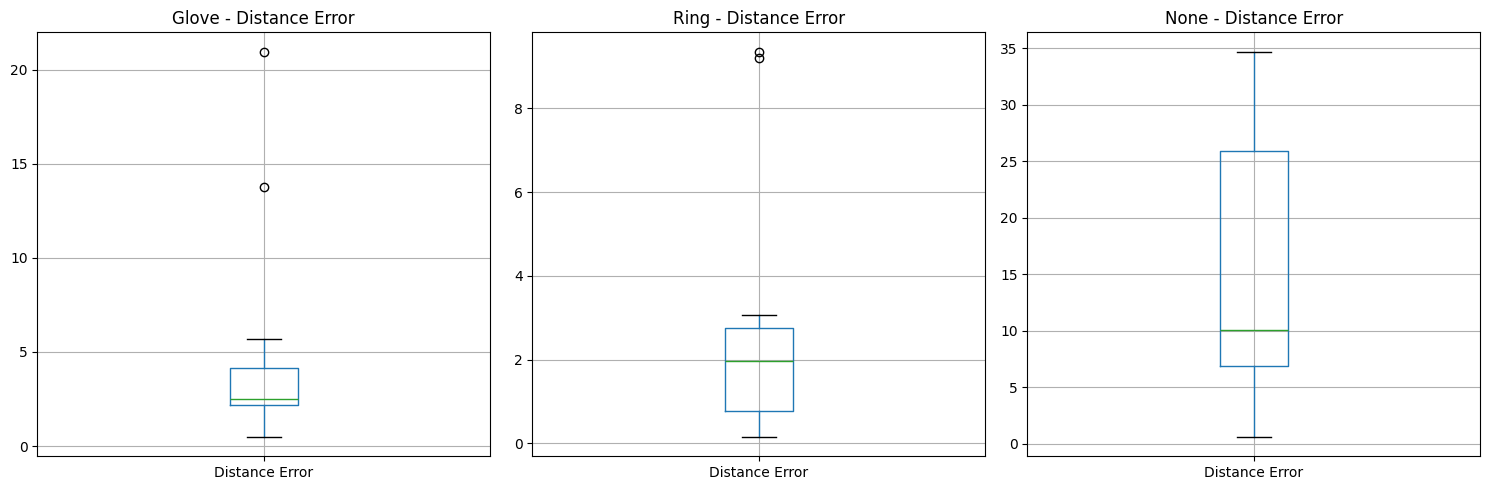

In [ ]:
# 3. check for outliers with boxplot
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 3, figsize=(15, 5))

glove_x.boxplot(column='Distance Error', ax=axes[0])
axes[0].set_title('Glove - Distance Error')

ring_x.boxplot(column='Distance Error', ax=axes[1])
axes[1].set_title('Ring - Distance Error')

none_x.boxplot(column='Distance Error', ax=axes[2])
axes[2].set_title('None - Distance Error')

plt.tight_layout()
plt.show()

In [ ]:
# 5. Shapiro-wilk normality test
print("Glove")
print(pingouin.normality(glove_x['Distance Error']))
print("Ring")
print(pingouin.normality(ring_x['Distance Error']))
print("None")
print(pingouin.normality(none_x['Distance Error']))

Glove
                       W    pval  normal
Distance Error  0.671164  0.0002   False
Ring
                       W      pval  normal
Distance Error  0.727038  0.001045   False
None
                       W      pval  normal
Distance Error  0.909181  0.238496    True


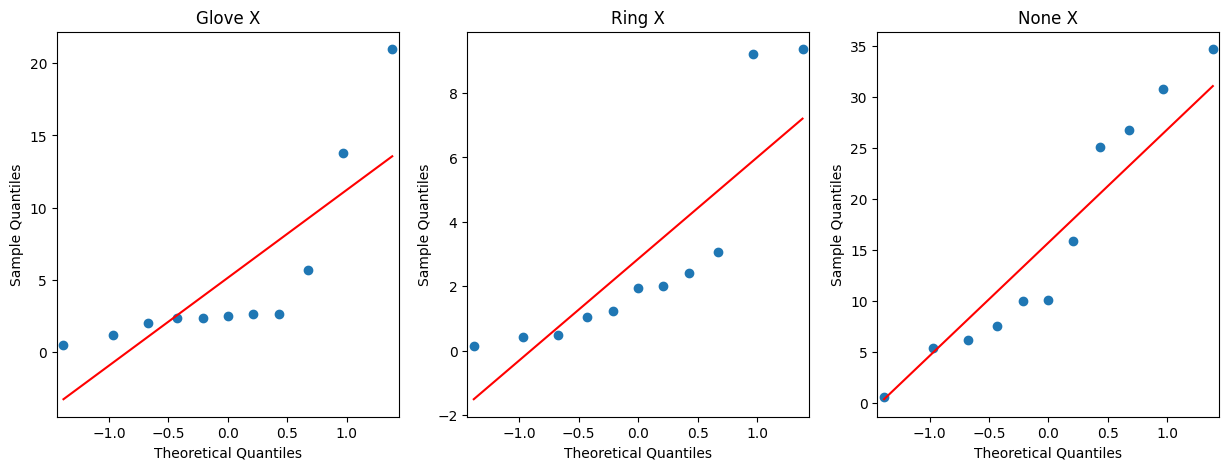

In [ ]:
# 5. visualize normality using Q-Q plots
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

sm.qqplot(glove_x['Distance Error'], line='s', ax=axes[0])
axes[0].set_title('Glove X')

sm.qqplot(ring_x['Distance Error'], line='s', ax=axes[1])
axes[1].set_title('Ring X')

sm.qqplot(none_x['Distance Error'], line='s', ax=axes[2])
axes[2].set_title('None X')

plt.show()


Test sphericity:
Since normality was not met and a repeated measures anova is not appropriate, it is not necessary to test sphericity.

Statistical tests:

In [ ]:
x_wide = dfc[dfc['Axis'] == 'x'].pivot(index='User', columns='Device', values='Distance Error')
print(x_wide)

Device     glove      none     ring
User                               
1        2.36405  10.05069  1.05235
2        1.19163  34.70703  9.35799
3       13.75403   6.16415  1.96286
4        2.61311  10.09699  9.19571
5        2.50125  15.88171  2.01683
6        2.00220   7.59221  0.47607
7        5.67432  26.79105  1.24034
8       20.97625   5.37362  3.07242
9        2.66556  25.11175  0.15136
10       2.36405   0.61705  2.41886
11       0.47851  30.80535  0.42321


In [ ]:
# friedman test

pingouin.friedman(x_wide)


,Source,W,ddof1,Q,p-unc
Friedman,Within,0.404959,2,8.909091,0.011626


p-value < .05 -> significant
Effect size: W = .405 -> moderate agreement

Post Hoc Tests:

Check Wilcoxon Signed-rank assumptions:
1. Dependent variable is ordinal or continuous
2. Independent variable is 2 categorical related groups
3. Distribution of differences between groups are approximately symmetrical
4. Results are independent within pairs

In [ ]:
# 3. check wilcoxon assumption of symmetrical distribution differences

x_wide['GR_diff'] = x_wide['glove'] - x_wide['ring']
x_wide['GN_diff'] = x_wide['glove'] - x_wide['none']
x_wide['RN_diff'] = x_wide['ring'] - x_wide['none']

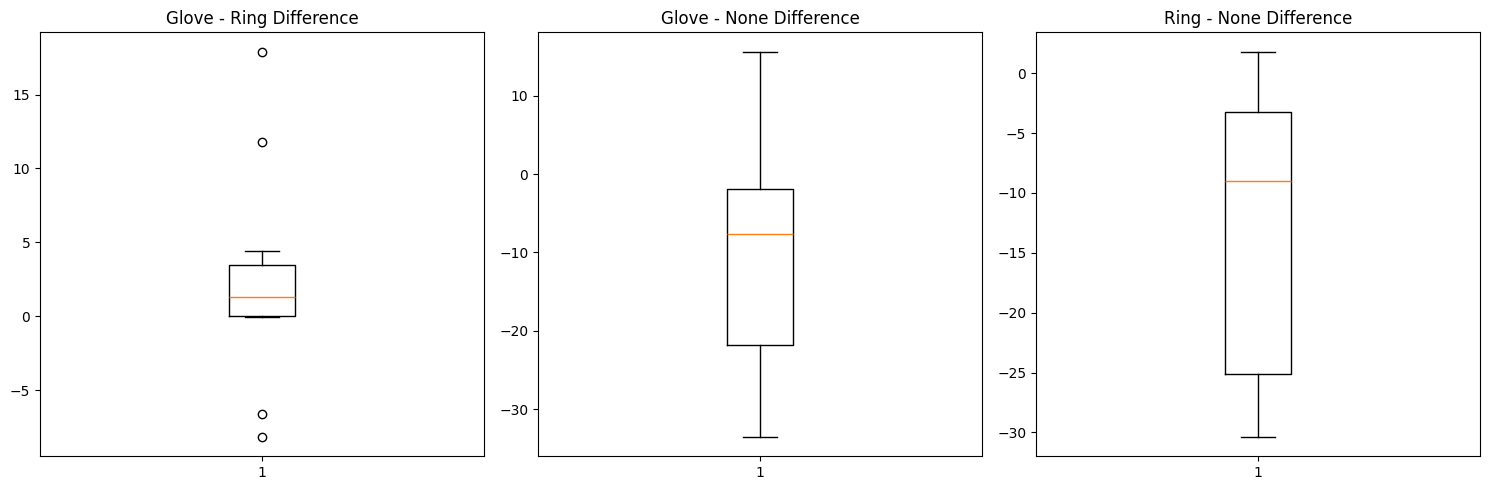

In [ ]:
# 3. visualize distribution
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

axes[0].boxplot(x_wide['GR_diff'])
axes[0].set_title('Glove - Ring Difference')

axes[1].boxplot(x_wide['GN_diff'])
axes[1].set_title('Glove - None Difference')

axes[2].boxplot(x_wide['RN_diff'])
axes[2].set_title('Ring - None Difference')

plt.tight_layout()
plt.show()

In [ ]:
# wilcoxon
distance_x_GR_result = pg.wilcoxon(x_wide['glove'], x_wide['ring'])
distance_x_GN_result = pg.wilcoxon(x_wide['glove'], x_wide['none'])
distance_x_RN_result = pg.wilcoxon(x_wide['ring'], x_wide['none'])
print('Glove vs Ring')
print(distance_x_GR_result)
print('Glove vs None')
print(distance_x_GN_result)
print('None vs Ring')
print(distance_x_RN_result)

Glove vs Ring
          W-val alternative     p-val       RBC      CLES
Wilcoxon   18.0   two-sided  0.206055  0.454545  0.677686
Glove vs None
          W-val alternative     p-val       RBC      CLES
Wilcoxon   12.0   two-sided  0.067383 -0.636364  0.181818
None vs Ring
          W-val alternative    p-val       RBC      CLES
Wilcoxon    2.0   two-sided  0.00293 -0.939394  0.115702


In [ ]:
# BY correction
x_pvals = [distance_x_GR_result['p-val'][0], distance_x_GN_result['p-val'][0],distance_x_RN_result['p-val'][0]]
adjusted_x_distance = scipy.stats.false_discovery_control(x_pvals, method='by')
labels = ['Glove vs Ring ', 'Glove vs None ', 'Ring vs None ']
for label, p in zip(labels, adjusted_x_distance):
    print(f"{label}: {p:.3f}")

Glove vs Ring : 0.378
Glove vs None : 0.185
Ring vs None : 0.016


/tmp/ipython-input-4112573675.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x_pvals = [distance_x_GR_result['p-val'][0], distance_x_GN_result['p-val'][0],distance_x_RN_result['p-val'][0]]


Glove vs Ring Distance Error X:

p-value > .05 -> no significant difference

Effect size: RBC = .454 -> medium effect  CLES = .677 -> glove has a higher distance error 68% of the time.

Glove vs None Distance Error X:

p-value > .05 -> no significant difference

Effect size: RBC = -.636 -> large effect  CLES = .182 -> glove has a higher distance error 18% of the time.

Ring vs None Distance Error X:

p-value < .05 -> significant difference

Effect size: RBC = -.939 -> very large effect  CLES = .116 -> ring has a higher distance error 12% of the time.

#Distance Y Calculations

Check one-way repeated measures Anova assumptions:

1. Dependent variable is continous
2. independent variable is 2 or more categorical related groups
3. There are no significant outliers
4. Two or more related groups being measured
5. Normality of ditribution
6. Sphericity (variances of differences between groups should be approximately equal)

Checking normality assumption:

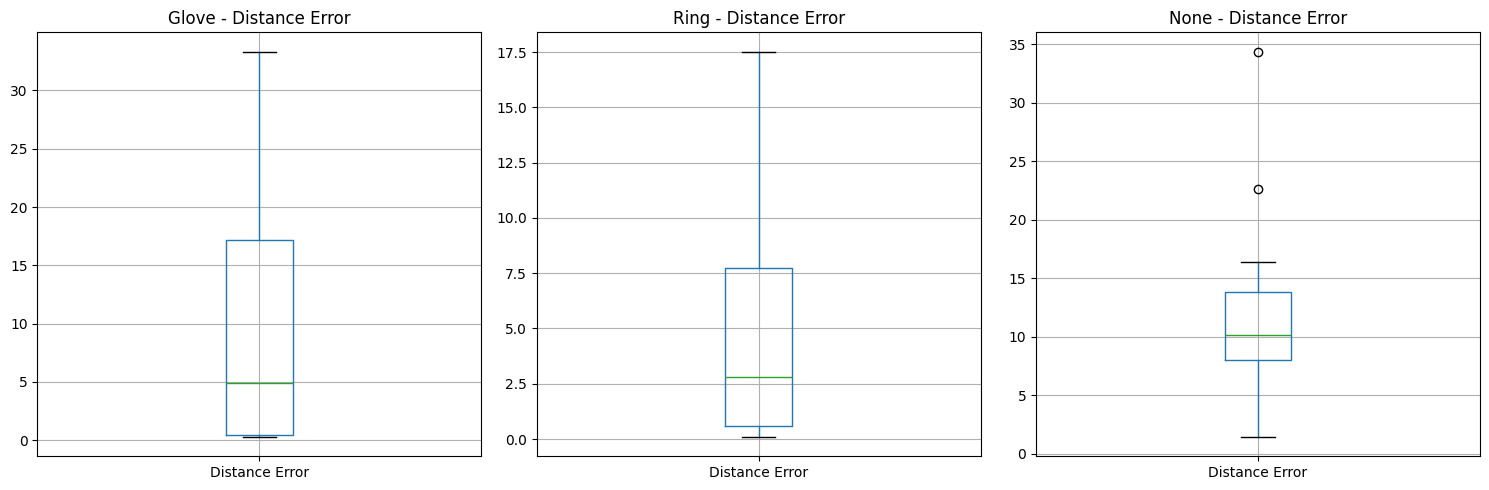

In [ ]:
# 3. check for outliers with boxplot
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 3, figsize=(15, 5))

glove_y.boxplot(column='Distance Error', ax=axes[0])
axes[0].set_title('Glove - Distance Error')

ring_y.boxplot(column='Distance Error', ax=axes[1])
axes[1].set_title('Ring - Distance Error')

none_y.boxplot(column='Distance Error', ax=axes[2])
axes[2].set_title('None - Distance Error')

plt.tight_layout()
plt.show()

In [ ]:
# 5. Shapiro-wilk normality test
print("Glove")
print(pingouin.normality(glove_y['Distance Error']))
print("Ring")
print(pingouin.normality(ring_y['Distance Error']))
print("None")
print(pingouin.normality(none_y['Distance Error']))

Glove
                       W      pval  normal
Distance Error  0.835064  0.027208   False
Ring
                       W      pval  normal
Distance Error  0.839776  0.031369   False
None
                       W      pval  normal
Distance Error  0.845893  0.037719   False


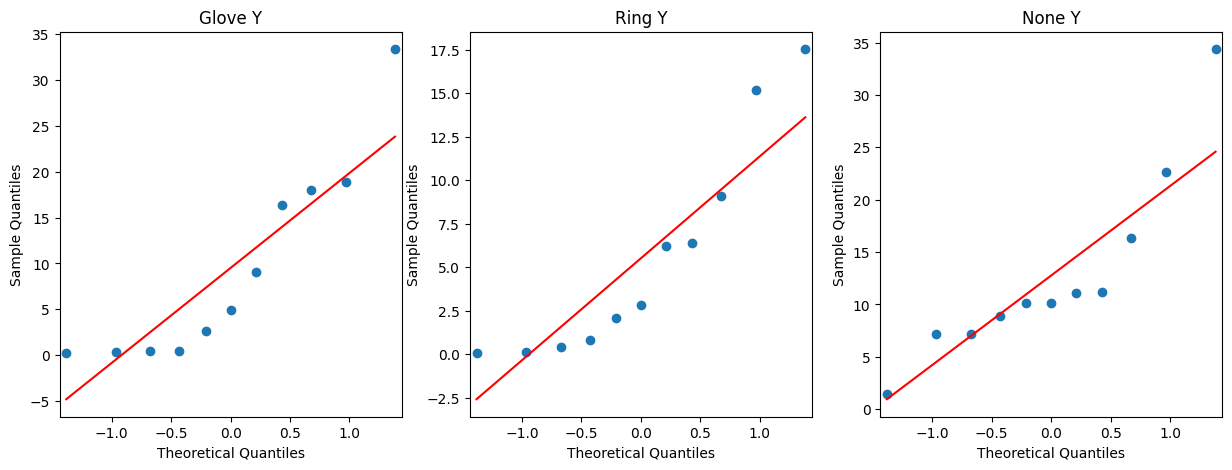

In [ ]:
# 5. visualize normality using Q-Q plots
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

sm.qqplot(glove_y['Distance Error'], line='s', ax=axes[0])
axes[0].set_title('Glove Y')

sm.qqplot(ring_y['Distance Error'], line='s', ax=axes[1])
axes[1].set_title('Ring Y')

sm.qqplot(none_y['Distance Error'], line='s', ax=axes[2])
axes[2].set_title('None Y')

plt.show()

Test sphericity:
Since normality was not met and a repeated measures anova is not appropriate, it is not necessary to test sphericity.

Statistical tests:

In [ ]:
y_wide = dfc[dfc['Axis'] == 'y'].pivot(index='User', columns='Device', values='Distance Error')
print(y_wide)

Device     glove      none      ring
User                                
1        9.02879   1.41418   6.35779
2       18.02695  22.61465  17.52532
3        0.28219   7.19256   0.09065
4       33.33578  11.20982   6.21469
5        2.63022  11.04947   0.37913
6       18.82117  10.14546   9.07678
7       16.36259  34.35936  15.15557
8        0.45932  10.09538   0.09343
9        0.32332   8.86811   2.06963
10       0.43987   7.13906   0.80746
11       4.89961  16.33604   2.81387


In [ ]:
# friedman test
pingouin.friedman(y_wide)


,Source,W,ddof1,Q,p-unc
Friedman,Within,0.471074,2,10.363636,0.005618


p-value < .05 -> significant
Effect size: W = .471 -> moderate agreement

Post Hoc Tests:

Check Wilcoxon Signed-rank assumptions:
1. dependent variable is ordinal or continuous
2. independent variable is 2 categorical related groups
3. distribution of differences between groups are approximately symmetrical
4. results are independent within pairs

In [ ]:
# 3. check wilcoxon assumption of symmetrical distribution differences

y_wide['GR_diff'] = y_wide['glove'] - y_wide['ring']
y_wide['GN_diff'] = y_wide['glove'] - y_wide['none']
y_wide['RN_diff'] = y_wide['ring'] - y_wide['none']

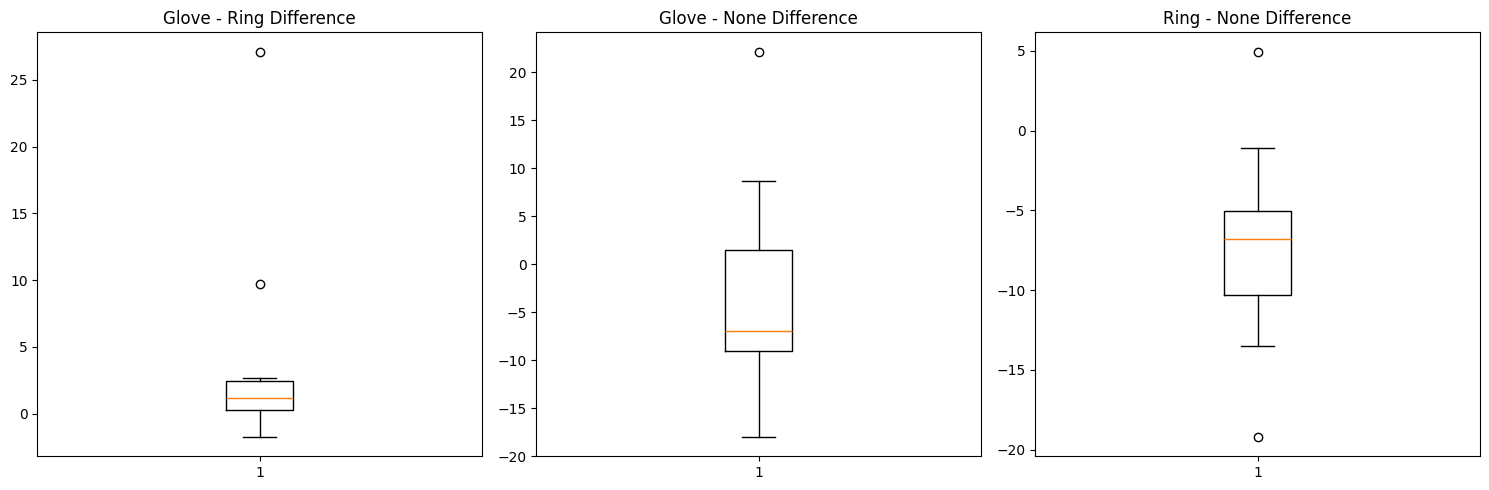

In [ ]:
# 3. visualize distribution of differences
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

axes[0].boxplot(y_wide['GR_diff'])
axes[0].set_title('Glove - Ring Difference')

axes[1].boxplot(y_wide['GN_diff'])
axes[1].set_title('Glove - None Difference')

axes[2].boxplot(y_wide['RN_diff'])
axes[2].set_title('Ring - None Difference')

plt.tight_layout()
plt.show()

Wilcoxon assumptions not met.

Check Assumptions of the Paired samples sign test:
1. Dependent variable is continuous
2. Independent variable is categorical and related
3. Paired observations are independent
4. Difference between scores have a continuous distribution.

In [ ]:
# sign test

from scipy.stats import binomtest
import numpy as np

# Glove vs Ring
print("Glove vs Ring:")
diff_GRy = y_wide['glove'] - y_wide['ring']
GRy_pos = np.sum(diff_GRy > 0)
GRy_neg = np.sum(diff_GRy < 0)
n = GRy_pos + GRy_neg

GRy_cles = GRy_pos / n
GRy_results = binomtest(GRy_pos, n, p=0.5, alternative='two-sided')

print(f"Positives: {GRy_pos}, Negatives: {GRy_neg}")
print(f"p-value: {GRy_results.pvalue:.4f}, CLES: {GRy_cles:.3f}")


# Glove vs None
print("Glove vs None:")
diff_GNy = y_wide['glove'] - y_wide['none']
GNy_pos = np.sum(diff_GNy > 0)
GNy_neg = np.sum(diff_GNy < 0)
n = GNy_pos + GNy_neg

GNy_cles = GNy_pos / n
GNy_results = binomtest(GNy_pos, n, p=0.5, alternative='two-sided')

print(f"Positives: {GNy_pos}, Negatives: {GNy_neg}")
print(f"p-value: {GNy_results.pvalue:.4f}, CLES: {GNy_cles:.3f}")


# Ring vs None
print("Ring vs None:")
diff_RNy = y_wide['ring'] - y_wide['none']
RNy_pos = np.sum(diff_RNy > 0)
RNy_neg = np.sum(diff_RNy < 0)
n = RNy_pos + RNy_neg

RNy_cles = RNy_pos / n
RNy_results = binomtest(RNy_pos, n, p=0.5, alternative='two-sided')

print(f"Positives: {RNy_pos}, Negatives: {RNy_neg}")
print(f"p-value: {RNy_results.pvalue:.4f}, CLES: {RNy_cles:.3f}")


Glove vs Ring:
Positives: 9, Negatives: 2
p-value: 0.0654, CLES: 0.818
Glove vs None:
Positives: 3, Negatives: 8
p-value: 0.2266, CLES: 0.273
Ring vs None:
Positives: 1, Negatives: 10
p-value: 0.0117, CLES: 0.091


In [ ]:
# BY correction
y_pvals = [GRy_results.pvalue, GNy_results.pvalue,RNy_results.pvalue]
adjusted_y_distance = scipy.stats.false_discovery_control(y_pvals, method='by')
labels = ['Glove vs Ring: ', 'Glove vs None: ', 'Ring vs None: ']
for label, p in zip(labels, adjusted_y_distance):
    print(f"{label}: {p:.3f}")

Glove vs Ring: : 0.180
Glove vs None: : 0.415
Ring vs None: : 0.064


Glove vs Ring Distance Error Y:

p-value > .05 -> no significant difference

Effect size: CLES = .182 -> Glove has a higher distance error 18% of the time.

Glove vs None Distance Error Y:

p-value > .05 -> no significant difference

Effect size: CLES = .273 -> Glove has a higher distance error 27% of the time.

Glove vs Ring Distance Error Y:

p-value > .05 -> no significant difference

Effect size: CLES = .091 -> Ring has a higher distance error 9% of the time.

#Distance Z Calculations

Check one-way repeated measures Anova assumptions:

1. Dependent variable is continous
2. independent variable is 2 or more categorical related groups
3. There are no significant outliers
4. Two or more related groups being measured
5. Normality of ditribution
6. Sphericity (variances of differences between groups should be approximately equal)

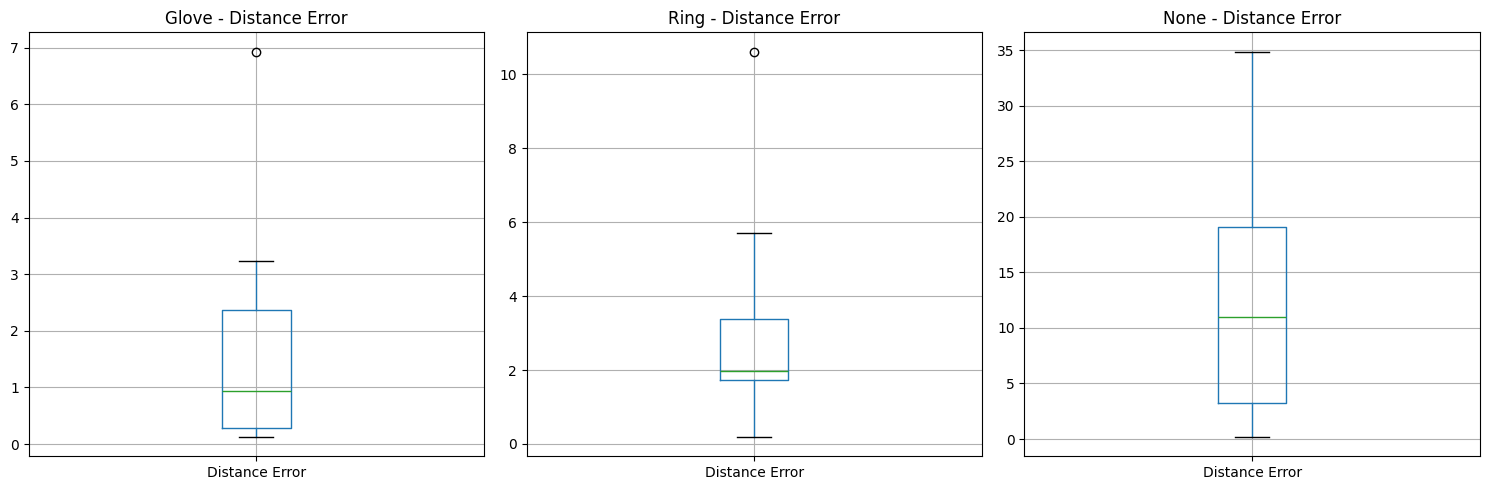

In [ ]:
# 3. check for outliers with boxplot
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 3, figsize=(15, 5))

glove_z.boxplot(column='Distance Error', ax=axes[0])
axes[0].set_title('Glove - Distance Error')

ring_z.boxplot(column='Distance Error', ax=axes[1])
axes[1].set_title('Ring - Distance Error')

none_z.boxplot(column='Distance Error', ax=axes[2])
axes[2].set_title('None - Distance Error')

plt.tight_layout()
plt.show()

In [ ]:
# 5. Shapiro-wilk normality test
print("Glove")
print(pingouin.normality(glove_z['Distance Error']))
print("Ring")
print(pingouin.normality(ring_z['Distance Error']))
print("None")
print(pingouin.normality(none_z['Distance Error']))

Glove
                      W    pval  normal
Distance Error  0.77413  0.0043   False
Ring
                       W      pval  normal
Distance Error  0.784605  0.005902   False
None
                       W      pval  normal
Distance Error  0.914946  0.278765    True


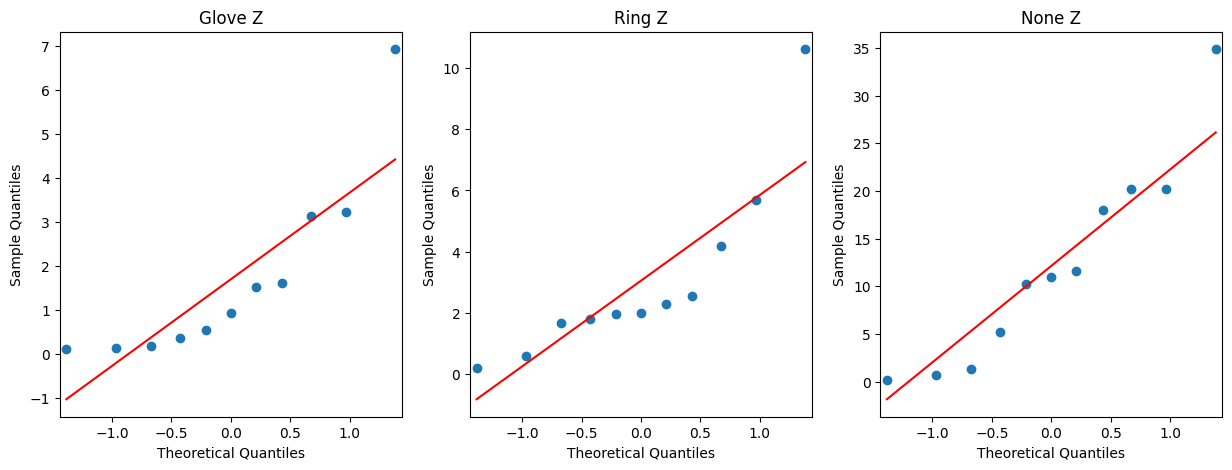

In [ ]:
# 5. visualize normality using Q-Q plots
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

sm.qqplot(glove_z['Distance Error'], line='s', ax=axes[0])
axes[0].set_title('Glove Z')

sm.qqplot(ring_z['Distance Error'], line='s', ax=axes[1])
axes[1].set_title('Ring Z')

sm.qqplot(none_z['Distance Error'], line='s', ax=axes[2])
axes[2].set_title('None Z')

plt.show()

Test sphericity:
Since normality was not met and a repeated measures anova is not appropriate, it is not necessary to test sphericity.

Statistical Tests:

In [ ]:
z_wide = dfc[dfc['Axis'] == 'z'].pivot(index='User', columns='Device', values='Distance Error')
print(z_wide)

Device    glove      none      ring
User                               
1       0.93553  20.19308   1.98739
2       0.55590  18.02115   1.96769
3       3.22812   0.18043   2.56290
4       0.37190  10.28128  10.61652
5       1.52111  34.87744   0.60273
6       0.13566  11.01376   2.28458
7       0.12586   1.27098   5.70122
8       6.92849  11.60145   1.80018
9       1.60839  20.21713   1.67922
10      0.18076   0.69219   0.18827
11      3.13004   5.25276   4.19640


In [ ]:
# friedman test
pingouin.friedman(z_wide)

,Source,W,ddof1,Q,p-unc
Friedman,Within,0.404959,2,8.909091,0.011626


p-value < .05 -> significant
Effect size: W = .405 -> moderate agreement

Post Hoc Tests:

In [ ]:
# check wilcoxon assumption of symmetrical distribution differences

z_wide['GR_diff'] = z_wide['glove'] - z_wide['ring']
z_wide['GN_diff'] = z_wide['glove'] - z_wide['none']
z_wide['RN_diff'] = z_wide['ring'] - z_wide['none']

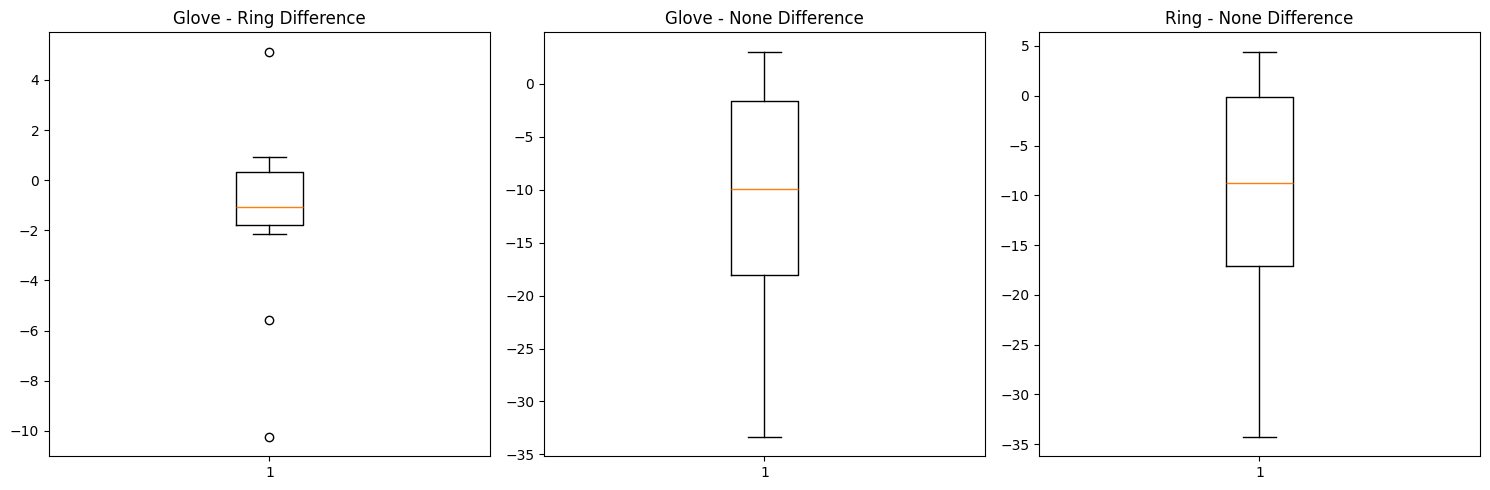

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

axes[0].boxplot(z_wide['GR_diff'])
axes[0].set_title('Glove - Ring Difference')

axes[1].boxplot(z_wide['GN_diff'])
axes[1].set_title('Glove - None Difference')

axes[2].boxplot(z_wide['RN_diff'])
axes[2].set_title('Ring - None Difference')

plt.tight_layout()
plt.show()

Wilcoxon assumptions not met.

Check Assumptions of the Paired samples sign test:
1. Dependent variable is continuous
2. Independent variable is categorical and related
3. Paired observations are independent
4. Difference between scores have a continuous distribution.

In [ ]:
# sign test

from scipy.stats import binomtest
import numpy as np

# Glove vs Ring
print("Glove vs Ring:")
diff_GRz = z_wide['glove'] - z_wide['ring']
GRz_pos = np.sum(diff_GRz > 0)
GRz_neg = np.sum(diff_GRz < 0)
n = GRz_pos + GRz_neg

GRz_cles = GRz_pos / n
GRz_results = binomtest(GRz_pos, n, p=0.5, alternative='two-sided')

print(f"Positives: {GRz_pos}, Negatives: {GRz_neg}")
print(f"p-value: {GRz_results.pvalue:.4f}, CLES: {GRz_cles:.3f}")


# Glove vs None
print("Glove vs None:")
diff_GNz = z_wide['glove'] - z_wide['none']
GNz_pos = np.sum(diff_GNz > 0)
GNz_neg = np.sum(diff_GNz < 0)
n = GNz_pos + GNz_neg

GNz_cles = GNz_pos / n
GNz_results = binomtest(GNz_pos, n, p=0.5, alternative='two-sided')

print(f"Positives: {GNz_pos}, Negatives: {GNz_neg}")
print(f"p-value: {GNz_results.pvalue:.4f}, CLES: {GNz_cles:.3f}")


# Ring vs None
print("Ring vs None:")
diff_RNz = z_wide['ring'] - z_wide['none']
RNz_pos = np.sum(diff_RNz > 0)
RNz_neg = np.sum(diff_RNz < 0)
n = RNz_pos + RNz_neg

RNz_cles = RNz_pos / n
RNz_results = binomtest(RNz_pos, n, p=0.5, alternative='two-sided')

print(f"Positives: {RNz_pos}, Negatives: {RNz_neg}")
print(f"p-value: {RNz_results.pvalue:.4f}, CLES: {RNz_cles:.3f}")


Glove vs Ring:
Positives: 3, Negatives: 8
p-value: 0.2266, CLES: 0.273
Glove vs None:
Positives: 1, Negatives: 10
p-value: 0.0117, CLES: 0.091
Ring vs None:
Positives: 3, Negatives: 8
p-value: 0.2266, CLES: 0.273


In [ ]:
# BY correction
z_pvals = [GRz_results.pvalue, GNz_results.pvalue,RNz_results.pvalue]
adjusted_z_distance = scipy.stats.false_discovery_control(z_pvals, method='by')
labels = ['Glove vs Ring: ', 'Glove vs None: ', 'Ring vs None: ']
for label, p in zip(labels, adjusted_z_distance):
    print(f"{label}: {p:.3f}")

Glove vs Ring: : 0.415
Glove vs None: : 0.064
Ring vs None: : 0.415


Glove vs Ring Distance Error Z:

p-value > .05 -> no significant difference

Effect size: CLES = .273 -> Glove has a higher distance error 27% of the time.

Glove vs None Distance Error Z:

p-value > .05 -> no significant difference

Effect size: CLES = .091 -> Glove has a higher distance error 9% of the time.

Ring vs None Distance Error Z:

p-value > .05 -> no significant difference

Effect size: CLES = .273 -> Ring has a higher distance error 27% of the time.